# Cursos de Series de tiempo con *Machine Learning*
## Modulo 3.1. Data Wrangling con Pandas para series de tiempo
                        Elaborado por: Naren Castellon
            
### Contenido
1. Cargar las librerias
1. Cargar datos con pandas
2. Exploración pandasql
3. Orden by
4. Agregación
5. Join merge
6. Summary  de Data Frame
7. Resampling
8. Función window
9. Shifting
10. Manejo de datos nulos
12. Feature time series

# Data Wrangling para Series de Tiempo

`Data Wrangling` es el arte de transformar y mapear datos sin procesar en información valiosa con la ayuda de estrategias de preprocesamiento. Su objetivo es proporcionar datos enriquecidos que se pueden utilizar para obtener la máxima información. Comprende operaciones como carga, imputación, aplicación de transformaciones, tratamiento de valores atípicos, limpieza, integración, manejo de inconsistencias, reducción de dimensionalidad y características de ingeniería. La disputa de datos es una parte integral y principal del modelado de **Machine Learning**. Los datos del mundo real son, sin duda, confusos, y no es razonable utilizar los datos directamente para modelar sin realizar algunas disputas.

En este cuaderno presenta cómo leer múltiples formatos de archivos de datos con la ayuda de Pandas. Cubre cómo hacer la selección, transformación y limpieza de datos, así como también cómo derivar estadísticas básicas con la ayuda de `Pandas` y `Pandasql`.

# 1. Cargar librerias

In [11]:
# Procesamiento y manejo de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Hide warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

# 2. Cargar datos con pandas

`Pandas` es el framework más notable para la Data Wrangling. Incluye herramientas de manipulación y análisis de datos destinadas a hacer que el análisis de datos sea rápido y conveniente. 

En el mundo real, los datos se generan a través de varias herramientas y dispositivos; por lo tanto, viene en diferentes formatos, como 

- Formato CSV
- Formato Excel 
- Formato JSON 

Además, a veces es necesario leer los datos de una URL. Todos los datos comprenden varios registros y variables. En esta sección, aprenderemos cómo se manejan varios formatos de datos con Pandas.

### 2.1 Cargando data usando CSV

Este conjunto de datos muestra el número de nacimientos de mujeres a lo largo del tiempo. Pandas tiene una función integrada para leer archivos CSV. El siguiente código importa el conjunto de datos:

In [215]:
walmart_df = pd.read_csv("https://raw.githubusercontent.com/narencastellon/Serie-de-tiempo-con-Machine-Learning/refs/heads/main/Data/walmart-sales-dataset-of-stores.csv")
walmart_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


El método `df.head()` nos permite conocer las primeras 5 lineas de nuestro conjunto de datos

In [216]:
walmart_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


El método `df.tail()` nos permite conocer las últimas 5 lineas de nuestro conjunto de datos:

In [217]:
walmart_df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


La funcion `df.info()` nos muestra la información general de nuestro datos

In [218]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Para conocer el tipo de datos que tiene nuestro dataset, usamos el método:  `df.dtypes`

In [219]:
walmart_df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

### 2.2 Cargando Data usando EXCEL

El siguiente conjunto de datos contiene la producción de `Esparragos de Peru`

In [220]:
import pandas as pd
dfExcel = pd.read_excel("https://github.com/narencastellon/Serie-de-tiempo-con-Machine-Learning/raw/refs/heads/main/Data/esparrago.xlsx", sheet_name = "Hoja1")
dfExcel.head()

,date,esparrago,temperatura,precipitacion,humeda,is_esparrago
0,2001-01-01,8674.0,21.5,0.40,75.4,8529.0
1,2001-02-01,7448.4,23.8,1.30,76.1,8319.0
2,2001-03-01,7564.5,23.5,1.30,76.0,7889.0
3,2001-04-01,7023.0,21.4,0.87,74.3,7727.0
4,2001-05-01,5683.0,18.1,0.20,73.7,7462.0


### 2.3 Cargado data usando JSON

Este conjunto de datos de ejemplo está en formato JSON. El siguiente código importa el conjunto de datos:

In [ ]:
dfJson = pd.read_json("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/test.json")
dfJson

### 2.4 Cargando data usando URL

El conjunto de datos de Abalone comprende 4177 observaciones y 9 variables. No está en ninguna estructura de archivos; en cambio, podemos mostrarlo como texto en la URL específica. 

Los datos lo podemos encontrar en la siguiente dirección:

https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

El siguiente código importa el conjunto de datos:

In [ ]:
dfURL = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', names =['Sex',
                           'Length','Diameter', 'Height','Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'Rings'])
dfURL.head()

## 2.4 Cargando datos Financieros

In [136]:
# Financial Market data
import yfinance as yf

In [137]:
# Leemos los datos
data = yf.download('^GSPC',start='2020-01-01', 
                      end='2023-04-27',) # S&P500

data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3459930000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3484700000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3702460000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3435910000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3726840000


# 3. Exploración Inicial de Datos

## 3.1 Visualizar las primeras filas y últimas filas del DataFrame.

In [ ]:
walmart_df.head()

In [ ]:
walmart_df.tail()

### 3.3 Verificar el tipo de datos de cada columna.

Verificar los tipos de datos en un conjunto de datos es fundamental por varias razones importantes:

1. **Integridad de los datos**:
   - Comprobar los tipos de datos ayuda a garantizar que los datos estén correctamente formateados y sean coherentes en toda la base de datos. Esto es crucial para evitar errores en el análisis y en los cálculos posteriores.

2. **Operaciones adecuadas**:
   - Los diferentes tipos de datos requieren operaciones diferentes. Por ejemplo, las operaciones aritméticas están destinadas a números, no a cadenas de texto. Verificar los tipos de datos te ayuda a realizar las operaciones correctas en tus datos.

3. **Optimización de memoria**:
   - Al conocer los tipos de datos en tu conjunto de datos, puedes optimizar el uso de la memoria al elegir el tipo de datos más adecuado para almacenar la información. Utilizar tipos de datos más pequeños cuando sea posible puede reducir significativamente el uso de memoria.

4. **Interpretación correcta**:
   - Los tipos de datos adecuados son esenciales para interpretar correctamente los datos. Por ejemplo, si una fecha se almacena como una cadena de texto en lugar de un tipo de fecha, las operaciones de tiempo y fechas no se podrán realizar correctamente.

5. **Visualización y presentación**:
   - Los programas de visualización y análisis de datos interpretan los tipos de datos para presentar la información de manera adecuada. Con los tipos de datos correctos, la visualización de los datos se puede hacer de manera más precisa y efectiva.

6. **Compatibilidad con funciones y librerías**:
   - Algunas funciones y librerías en Python, como las de Pandas y NumPy, requieren tipos de datos específicos para funcionar correctamente. Verificar los tipos de datos es esencial para garantizar la compatibilidad con estas herramientas.

En general, verificar y entender los tipos de datos en un conjunto de datos es crucial para asegurarse de que los datos se manejen de manera adecuada, se interpreten correctamente y se utilicen eficientemente en análisis posteriores. Además, esta verificación ayuda a prevenir errores y garantiza que las operaciones se realicen de manera precisa y efectiva.

In [ ]:
walmart_df.dtypes

# 4. Cambio de tipo de Datos

Uno de los procesos más importante en la series temporales es trabajar con las `fechas y tiempo`, para esto es necesario conocer adecuadamente como procesar los formatos de `fecha y tiempo`, con pandas podemos convertir sin ningun tipo de problemas, podemos revisar la documentacion en pandas en:

https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

## 4.1 Cambiando a fechas

Convertir una variable de tipo `object` que representa fechas a un formato de tiempo (datetime)

1. **Usando `pd.to_datetime()` de Pandas**:

In [ ]:
walmart_df['Date'] = pd.to_datetime(walmart_df['Date'])

In [ ]:
walmart_df.dtypes

In [ ]:
walmart_df.head()

2. **Especificando el formato de la fecha**:

In [ ]:
import pandas as pd
dfExcel = pd.read_excel("https://github.com/narencastellon/Serie-de-tiempo-con-Machine-Learning/raw/refs/heads/main/Data/esparrago.xlsx", sheet_name = "Hoja1")
dfExcel.head()

In [ ]:
dfExcel['date'] = pd.to_datetime(dfExcel['date'], format='%Y-%m-%d')

In [ ]:
dfExcel.dtypes

3. **Convirtiendo a formato de fecha y hora con el tiempo**:

In [ ]:
df_hora =  pd.read_csv("https://raw.githubusercontent.com/narencastellon/Serie-de-tiempo-con-Machine-Learning/refs/heads/main/Data/ads.csv")
df_hora.head()

In [ ]:
df_hora.dtypes

In [ ]:
# a veces es necesario agregar un formato
df_hora["Time"] = pd.to_datetime(df_hora['Time'], format = '%Y-%m-%d %H:%M:%S')

In [ ]:
df_hora.head()

4. **Usando `dateutil.parser` para manejar fechas ambiguas**:

In [ ]:
from dateutil import parser

df_hora =  pd.read_csv("https://raw.githubusercontent.com/narencastellon/Serie-de-tiempo-con-Machine-Learning/refs/heads/main/Data/ads.csv")

df_hora['Time'] = df_hora['Time'].apply(lambda x: parser.parse(x))

In [ ]:
df_hora.dtypes

5. **Creando una nueva columna de fecha y hora**:

In [ ]:
df_hora =  pd.read_csv("https://raw.githubusercontent.com/narencastellon/Serie-de-tiempo-con-Machine-Learning/refs/heads/main/Data/ads.csv")

df_hora['DateTime'] = pd.to_datetime(df_hora['Time'])
df_hora.head()

In [ ]:
df_hora.dtypes

## 4.2 Creando fechas

Muchas veces es necesario crear un datos de fechas, para esto podemos usar el método `pandas.date_range()` que nos permita construirlo


para mas información podes visitar:

https://pandas.pydata.org/docs/reference/api/pandas.date_range.html

In [ ]:
pd.date_range(start='1/1/2018', end='1/08/2018')

In [ ]:
pd.date_range(start='1/1/2018', periods=8)

In [ ]:
pd.date_range(start='2018-04-24', end='2018-04-27', periods=3)

Agregando frecuencias

https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases

In [ ]:
# Creamos 5 peridos mensuales para final de mes
pd.date_range(start='1/1/2018', periods=5, freq = 'M')

In [ ]:
# Creamos 5 peridos mensuales para inicio de mes
pd.date_range(start='1/1/2018', periods=5, freq = 'MS')

In [ ]:
pd.date_range(start='1/1/2018', periods=5, freq='3MS')

In [ ]:
pd.date_range(start='1/1/2018', periods=5, freq='h')

In [ ]:
pd.date_range(start='1/1/2018', periods=5, freq='5h')

In [ ]:
pd.date_range(start='1/1/2018', periods=5, freq='5min')

## 4.3 Convertir variable numerica tipo objeto a numerica

Cuando tienes una variable numérica representada como tipo object en un DataFrame de Pandas, puedes convertirla a un tipo numérico de diversas maneras. 

1. **Usando `pd.to_numeric()` de Pandas**:

In [ ]:
df_cerveza = pd.read_csv("./data/cerveja.csv").iloc[:,1:]
df_cerveza.head()

In [ ]:
df_cerveza.dtypes

In [ ]:
import pandas as pd

df_cerveza['Temperatura Media (C)'] = pd.to_numeric(df_cerveza['Temperatura Media (C)'], errors = 'coerce')
#df_cerveza.head()

In [ ]:
df_cerveza.dtypes

- Se refiere a una opción que se puede especificar para manejar errores durante la conversión de datos a tipo numérico.

- Al utilizar errors='coerce' con pd.to_numeric(), puedes manejar de forma más suave la conversión de datos a tipo numérico al asignar valores NaN a los elementos que no se pueden convertir, en lugar de interrumpir el proceso con errores.

2. **Usando `astype()` para convertir a tipo numérico**:

In [ ]:
# df_cerveza['Temperatura Minima (C)'] = df_cerveza['Temperatura Minima (C)'].str.replace(',', '.')
#df_cerveza.head()

In [ ]:
df_cerveza['Temperatura Minima (C)'] = df_cerveza['Temperatura Minima (C)'].astype(float)
df_cerveza

3. **Aplicando una función lambda para convertir a tipo numérico**:

In [ ]:
df_cerveza['Precipitacao (mm)'] = df_cerveza['Precipitacao (mm)'].apply(lambda x: float(x))

4. **Eliminando caracteres no numéricos y convirtiendo**:

In [ ]:
df_adidas = pd.read_csv("https://raw.githubusercontent.com/narencastellon/Serie-de-tiempo-con-Machine-Learning/refs/heads/main/Data/Adidas%20US%20Sales%20Data.csv",sep=";")
df_adidas.head()

In [ ]:
df_adidas.dtypes

In [ ]:
df_adidas['Price per Unit'] = df_adidas['Price per Unit'].str.replace('$', '').astype(float)
df_adidas.head()

In [ ]:
df_adidas.dtypes

In [ ]:
df_adidas['Operating Margin'] = df_adidas['Operating Margin'].str.replace('%', '').astype(float)
df_adidas['Operating Margin'] = df_adidas['Operating Margin'] / 100
df_adidas.head()

Estas son algunas formas de convertir una variable numérica representada como tipo `object` a un tipo numérico en un DataFrame de Pandas. Puedes elegir la que mejor se adapte a tus datos y requisitos específicos. Recuerda que es importante manejar posibles errores y caracteres no numéricos que puedan estar presentes en los datos antes de realizar la conversión.

In [ ]:
df_cerveza = pd.read_csv("./data/cerveja.csv").iloc[:,1:]
df_cerveza .replace({",":"."}, regex = True, inplace = True)
df_cerveza.head()

# 5. Exploración con metodos de pandas

El método `query()` en Pandas se utiliza para filtrar filas de un DataFrame según una expresión booleana. Este método facilita la selección de subconjuntos de datos que cumplen con ciertas condiciones. Aquí tienes una descripción detallada de cómo funciona el método `query()` en Pandas:

### Ejemplo de uso básico del método `query()`:

Supongamos que tienes un DataFrame llamado `df` con columnas `A`, `B`, y `C`. Puedes utilizar `query()` de la siguiente manera:

```python
resultado = df.query('A > 10 and B < 5')
```

En este ejemplo, la expresión `'A > 10 and B < 5'` se evaluará para cada fila del DataFrame, y solo se seleccionarán aquellas filas que cumplan con esta condición.

### Características clave del método `query()`:

1. **Sintaxis de la expresión**: La expresión que se pasa a `query()` debe ser una cadena de texto que represente una expresión booleana válida en Python. Puedes referirte a las columnas directamente por sus nombres.

2. **Uso de variables locales**: Puedes utilizar variables locales en la expresión pasada a `query()` utilizando el prefijo `@`. Por ejemplo: `umbral = 20; df.query('A > @umbral')`.

3. **Soporte para múltiples condiciones y operadores lógicos**: Puedes combinar múltiples condiciones con operadores lógicos como `and`, `or`, y `not`.

4. **Compatibilidad con funciones**: `query()` también es compatible con el uso de funciones y métodos de Pandas dentro de la expresión.

### Consideraciones importantes:

- **Eficiencia**: En comparación con otras formas de filtrar datos en Pandas, `query()` puede ser más eficiente en términos de velocidad de ejecución para expresiones simples.

- **Limitaciones**: Aunque es potente, `query()` tiene algunas limitaciones en términos de sintaxis y funcionalidad en comparación con otras formas de filtrar datos en Pandas.

En general, el método `query()` en Pandas es una herramienta útil para filtrar datos de un DataFrame de forma concisa y eficiente, especialmente para expresiones simples y directas.

## 5.1 Aplicar un filtro

El filtrado de datos es una parte importante del preprocesamiento de datos. Con el filtrado, podemos elegir una partición más pequeña del conjunto de datos y usar ese subconjunto para ver y editar; necesitamos criterios específicos o una regla para filtrar los datos. Esto también se conoce como subconjunto de datos o datos detallados. El siguiente ejemplo ilustra cómo aplicar un filtro con Pandas y Pandasql.

**Aquí está cómo hacerlo con Pandas:**

In [1]:
import pandas as pd
dfp = pd.read_excel("../Capacitacion_Especializacion/data/Absenteeism_at_work.xlsx")
dfp.head()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [119]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason_for_absence               740 non-null    int64
 2   Month_of_absence                 740 non-null    int64
 3   Day_of_the_week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation_expense           740 non-null    int64
 6   Distance_from_Residence_to_Work  740 non-null    int64
 7   Service_time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit_target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

In [120]:
dfp[(dfp['Age'] >=30) & (dfp['Age'] <=45)]

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,13,13,7,2,1,369,17,12,31,264604,...,0,1,3,1,0,0,70,169,25,80
735,11,14,7,3,1,289,36,13,33,264604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271219,...,0,1,1,1,0,8,98,170,34,0


Con el método `query()`

In [121]:
dfp.query('30 <= Age <= 45')

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,13,13,7,2,1,369,17,12,31,264604,...,0,1,3,1,0,0,70,169,25,80
735,11,14,7,3,1,289,36,13,33,264604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271219,...,0,1,1,1,0,8,98,170,34,0


### 5.2 Distince(Unique)/ Distinto (único)

Existen varios registros duplicados en el conjunto de datos. Si queremos seleccionar la cantidad de valores únicos para la variable específica, podemos usar la función `unique()` de Pandas. El siguiente ejemplo ilustra cómo hacer esto con Pandas.

        Aquí está cómo hacerlo con Pandas:

In [122]:
walmart_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


Queremos revisar cuantas tiendas tenemos

In [124]:
walmart_df["Store"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [125]:
walmart_df["Store"].nunique()

45

### 5.3 IN & NOT IN

El filtrado de datos es un proceso de extracción de datos esenciales de un conjunto de datos mediante el uso de alguna condición. Hay varios métodos para filtrar en un conjunto de datos. A veces queremos investigar si los datos se han asociado con un marco de datos o una serie en particular. 

En tal caso, podemos usar la función [`isin()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html) de Pandas, que verifica si los valores están presentes en la secuencia. El trámite también se puede realizar en Pandasql. El siguiente ejemplo ilustra cómo hacerlo con Pandas.

    Aquí está cómo hacerlo con Pandas:

In [126]:
import pandas as pd
dfp = pd.read_excel("../Capacitacion_Especializacion/data/Absenteeism_at_work.xlsx")
dfp.head()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [127]:
dfp[dfp.Age.isin([20,30,40])]

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
47,15,23,9,5,1,291,31,12,40,241476,...,0,1,1,1,0,1,73,171,25,4
49,15,14,9,2,4,291,31,12,40,241476,...,0,1,1,1,0,1,73,171,25,32
65,22,23,10,5,4,179,26,9,30,253465,...,0,3,0,0,0,0,56,171,19,1
71,15,23,10,5,4,291,31,12,40,253465,...,0,1,1,1,0,1,73,171,25,5
75,15,14,10,3,4,291,31,12,40,253465,...,0,1,1,1,0,1,73,171,25,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,22,27,6,6,3,179,26,9,30,275089,...,0,3,0,0,0,0,56,171,19,2
717,22,13,6,5,3,179,26,9,30,275089,...,0,3,0,0,0,0,56,171,19,2
718,15,28,6,5,3,291,31,12,40,275089,...,0,1,1,1,0,1,73,171,25,2
719,22,13,6,2,1,179,26,9,30,275089,...,0,3,0,0,0,0,56,171,19,3


In [130]:
walmart_df[walmart_df["Store"].isin([1, 45, 37]) ]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


Tambien podemo usar el metodo `query()`

In [131]:
# Usar el método query para seleccionar las filas donde la tienda está en [1, 45, 37] 

walmart_df.query('Store in [1, 45, 37]')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [133]:
walmart_df[walmart_df["Store"].isin([1, 45, 37]) ].head(15)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,2010-09-04,1545418.53,0,65.86,2.770,210.622857,7.808


## NOT IN

La operación NOT IN se utiliza para un propósito similar al explicado anteriormente. Si queremos verificar si un valor no es parte de una secuencia, podemos usar el símbolo de tilde (~) para realizar una operación NOT IN.

        Aquí está el ejemplo con Pandas:

In [134]:
import pandas as pd
dfp = pd.read_excel("../Capacitacion_Especializacion/data/Absenteeism_at_work.xlsx")
dfp.head()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


En el siguiente filto me va a seleccionar la variable edad, menos las edades 20, 30, 40

In [135]:
dfp[~dfp.Age.isin([20,30,40])]

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,13,13,7,2,1,369,17,12,31,264604,...,0,1,3,1,0,0,70,169,25,80
735,11,14,7,3,1,289,36,13,33,264604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264604,...,0,3,1,0,0,1,88,172,29,4
738,8,0,0,4,2,231,35,14,39,271219,...,0,1,2,1,0,2,100,170,35,0


In [137]:
#  seleccionar las filas donde la tienda no está en [1, 35, 20] 
walmart_df[~walmart_df["Store"].isin([1, 35,20]) ]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
143,2,2010-05-02,2136989.46,0,40.19,2.572,210.752605,8.324
144,2,2010-12-02,2137809.50,1,38.49,2.548,210.897994,8.324
145,2,2010-02-19,2124451.54,0,39.69,2.514,210.945160,8.324
146,2,2010-02-26,1865097.27,0,46.10,2.561,210.975957,8.324
147,2,2010-05-03,1991013.13,0,47.17,2.625,211.006754,8.324
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


Con el metodo query

In [138]:
# Usar el método query para seleccionar las filas donde la tienda no está en [1, 35, 20] 
walmart_df.query('Store not in [1, 35, 20]')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
143,2,2010-05-02,2136989.46,0,40.19,2.572,210.752605,8.324
144,2,2010-12-02,2137809.50,1,38.49,2.548,210.897994,8.324
145,2,2010-02-19,2124451.54,0,39.69,2.514,210.945160,8.324
146,2,2010-02-26,1865097.27,0,46.10,2.561,210.975957,8.324
147,2,2010-05-03,1991013.13,0,47.17,2.625,211.006754,8.324
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


# 6. Orden by

### 6.1 **Orden de datos ascendente**

`ORDER BY` ordena el conjunto de resultados en orden *ascendente o descendente* según el valor seleccionado. Pandas tiene una función [`sort_value()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) que puede usar diferentes algoritmos de clasificación, como clasificación rápida, clasificación combinada y clasificación heap. El valor por defecto es de orden ascendente, cuyo valor booleano es True. Excepto por lo que respecta a los ejes, realizamos una clasificación como 0 para el índice y 1 para las columnas. SQL tiene una cláusula ORDER BY para realizar una operación de clasificación similar.

    Aquí está el ejemplo usando Pandas:

Orde el DataFrame por la variable edad de manera ascendente o menor a mayor usando el parametro `ascending = True`

In [139]:
# 
dfp.sort_values(by = ['Age'], ascending = True)

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
132,27,23,1,5,2,184,42,7,27,308593,...,0,1,0,0,0,0,58,167,21,2
137,27,23,2,6,2,184,42,7,27,302585,...,0,1,0,0,0,0,58,167,21,1
209,27,7,5,4,3,184,42,7,27,378884,...,0,1,0,0,0,0,58,167,21,4
118,27,23,1,5,2,184,42,7,27,308593,...,0,1,0,0,0,0,58,167,21,2
149,27,23,2,3,2,184,42,7,27,302585,...,0,1,0,0,0,0,58,167,21,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,9,25,3,3,2,228,14,16,58,222196,...,0,1,2,0,0,1,65,172,22,3
622,9,12,3,3,2,228,14,16,58,222196,...,0,1,2,0,0,1,65,172,22,112
640,9,25,3,4,2,228,14,16,58,222196,...,0,1,2,0,0,1,65,172,22,2
255,9,18,8,3,1,228,14,16,58,265615,...,0,1,2,0,0,1,65,172,22,8


In [141]:
dfp.sort_values(by = ['Age'], ascending = False)

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
434,9,18,5,4,3,228,14,16,58,246074,...,0,1,2,0,0,1,65,172,22,8
729,9,6,7,3,1,228,14,16,58,264604,...,0,1,2,0,0,1,65,172,22,120
255,9,18,8,3,1,228,14,16,58,265615,...,0,1,2,0,0,1,65,172,22,8
620,9,25,3,3,2,228,14,16,58,222196,...,0,1,2,0,0,1,65,172,22,3
727,9,6,7,2,1,228,14,16,58,264604,...,0,1,2,0,0,1,65,172,22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,27,23,9,3,1,184,42,7,27,241476,...,0,1,0,0,0,0,58,167,21,2
149,27,23,2,3,2,184,42,7,27,302585,...,0,1,0,0,0,0,58,167,21,8
132,27,23,1,5,2,184,42,7,27,308593,...,0,1,0,0,0,0,58,167,21,2
269,27,6,8,4,1,184,42,7,27,265615,...,0,1,0,0,0,0,58,167,21,8


In [142]:
walmart_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [146]:
walmart_df.sort_values("Date", ascending =  True)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
606,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768
2036,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067
5897,42,2010-01-10,481523.93,0,86.01,3.001,126.234600,9.003
4610,33,2010-01-10,224294.39,0,91.45,3.001,126.234600,9.265
5039,36,2010-01-10,422169.47,0,74.66,2.567,210.440443,8.476
...,...,...,...,...,...,...,...,...
5860,41,2012-12-10,1409544.97,0,39.38,3.760,199.053937,6.195
2285,16,2012-12-10,491817.19,0,43.26,3.760,199.053937,5.847
1427,10,2012-12-10,1713889.11,0,76.03,4.468,131.108333,6.943
3572,25,2012-12-10,697317.41,0,43.74,4.000,216.115057,7.293


Tambien se puede ordenar por un conjunto de variables

In [147]:
dfp.sort_values(by = ['Age','Service_time'], ascending=True)

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
40,27,23,9,3,1,184,42,7,27,241476,...,0,1,0,0,0,0,58,167,21,2
118,27,23,1,5,2,184,42,7,27,308593,...,0,1,0,0,0,0,58,167,21,2
132,27,23,1,5,2,184,42,7,27,308593,...,0,1,0,0,0,0,58,167,21,2
137,27,23,2,6,2,184,42,7,27,302585,...,0,1,0,0,0,0,58,167,21,1
149,27,23,2,3,2,184,42,7,27,302585,...,0,1,0,0,0,0,58,167,21,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,9,25,3,3,2,228,14,16,58,222196,...,0,1,2,0,0,1,65,172,22,3
622,9,12,3,3,2,228,14,16,58,222196,...,0,1,2,0,0,1,65,172,22,112
640,9,25,3,4,2,228,14,16,58,222196,...,0,1,2,0,0,1,65,172,22,2
727,9,6,7,2,1,228,14,16,58,264604,...,0,1,2,0,0,1,65,172,22,8


## 6.2 Orden de datos descendente
Como se mencionó, la función `sort_value()` puede clasificar los resultados en orden ascendente o descendente. Necesita el parámetro `ascendente = False` para ordenar los valores en orden descendente. También puede actualizar algunos otros parámetros, como se explica para ORDER BY ascendente.

    Aquí está el ejemplo con Pandas:

In [153]:
# ordena de forma descendente las fechas y las tiendas
walmart_df.sort_values(by = ["Date", "Store"], ascending = False)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6289,44,2012-12-10,337796.13,0,55.10,3.797,131.108333,5.217
6146,43,2012-12-10,619369.72,0,71.14,3.601,214.677283,8.839
6003,42,2012-12-10,612379.90,0,76.03,4.468,131.108333,6.943
5860,41,2012-12-10,1409544.97,0,39.38,3.760,199.053937,6.195
...,...,...,...,...,...,...,...,...
606,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768
463,4,2010-01-10,1842821.02,0,63.96,2.619,126.234600,7.127
320,3,2010-01-10,358784.10,0,73.60,2.603,214.984655,7.564
177,2,2010-01-10,1827440.43,0,69.24,2.603,211.329874,8.163


## 7. Aggregration

`Aggregration` es el proceso de extracción de datos para que los datos puedan investigarse, recopilarse y presentarse de manera resumida. Le permite realizar un cálculo en vectores únicos o múltiples, generalmente acompañado por las funciones `group by()` en Pandas. Realiza numerosas operaciones como dividir, aplicar y combinar. Este ejemplo ilustra la operación de agregación en Pandas y Pandasql.

Para el siguiente ejemplo, estamos aprovechando el argumento [agg](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html) en Pandas para lograr el resultado requerido:

In [154]:
import pandas as pd
dfp = pd.read_excel("../Capacitacion_Especializacion/data/Absenteeism_at_work.xlsx")
dfp.head()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [155]:
dfp.agg({'Transportation_expense': ['count','min', 'max', 'mean']})

,Transportation_expense
count,740.00000
min,118.00000
max,388.00000
mean,221.32973


In [156]:
dfp.agg({'Age': ['count','min', 'max', 'mean']})

,Age
count,740.00
min,27.00
max,58.00
mean,36.45


In [160]:
dfp["Age"].describe()

count    740.000000
mean      36.450000
std        6.478772
min       27.000000
25%       31.000000
50%       37.000000
75%       40.000000
max       58.000000
Name: Age, dtype: float64

## 7.1 Group by 

Podemos usar [GROUP BY](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html) para organizar datos idénticos en grupos según la función de agregación utilizada. En otras palabras, agrupa filas que tienen valores similares en filas de resumen. Realizamos esta operación con la función `groupby()` en Pandas. SQL tiene su cláusula GROUP BY para realizar una operación similar. El ejemplo ilustra la operación GROUP BY en Pandas y Pandasql.

Aquí está el ejemplo con Pandas:

In [161]:
import pandas as pd
dfp = pd.read_excel("../Capacitacion_Especializacion/data/Absenteeism_at_work.xlsx")
dfp.head()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [164]:
dfp.groupby(['ID'])[['Service_time']].sum()

,Service_time
ID,
1,322
2,72
3,2034
4,13
5,247
6,104
7,84
8,28
9,128


In [166]:
# una forma mas clara de usar grouby
dfp[["ID", "Service_time"]].groupby(["Service_time"]).sum().head()

,ID
Service_time,
1,84
3,240
4,288
6,210
7,189


In [172]:
walmart_df[["Date", "Store", "Weekly_Sales"]].groupby(["Date", ]).sum() # Weekly_Sales 

,Store,Weekly_Sales
Date,,
2010-01-10,1035,42239875.87
2010-02-04,1035,50423831.26
2010-02-07,1035,48917484.50
2010-02-19,1035,48276993.78
2010-02-26,1035,43968571.13
...,...,...
2012-10-08,1035,47403451.04
2012-10-19,1035,45122410.57
2012-10-26,1035,45544116.29


## 7.2 Group by con Aggregration

La función `groupby()` proporciona un grupo de datos similares basados en una característica seleccionada con esos datos; podemos realizar diferentes operaciones de agregación con la función `.agg()` en otras funciones de Pandas. En SQL, usamos GROUP BY para aplicar funciones agregadas en grupos de datos devueltos por una consulta. FILTER es un modificador que se usa con una función agregada para vincular los valores usados en una agregación.

    Aquí está el ejemplo con Pandas:

In [174]:
dfp.groupby('Reason_for_absence').agg({'Age': ['mean','min','max']}).head()

Age        
                         mean min max
Reason_for_absence                   
0                   39.604651  28  53
1                   37.687500  28  58
2                   28.000000  28  28
3                   40.000000  40  40
4                   45.000000  41  49

In [179]:
walmart_df[["Date", "Store", "Weekly_Sales"]].groupby(["Date", "Weekly_Sales"]).agg({'Weekly_Sales': ['mean','min','max']}).reset_index()

Date Weekly_Sales                                    
                                    mean         min         max
0    2010-01-10    224294.39   224294.39   224294.39   224294.39
1    2010-01-10    283178.12   283178.12   283178.12   283178.12
2    2010-01-10    300152.45   300152.45   300152.45   300152.45
3    2010-01-10    358784.10   358784.10   358784.10   358784.10
4    2010-01-10    360256.58   360256.58   360256.58   360256.58
...         ...          ...         ...         ...         ...
6430 2012-12-10   1713889.11  1713889.11  1713889.11  1713889.11
6431 2012-12-10   1900745.13  1900745.13  1900745.13  1900745.13
6432 2012-12-10   1999079.44  1999079.44  1999079.44  1999079.44
6433 2012-12-10   2133026.07  2133026.07  2133026.07  2133026.07
6434 2012-12-10   2162951.36  2162951.36  2162951.36  2162951.36

[6435 rows x 5 columns]

## 7.3 Tabla dinamica

La función `pivot_table()` en Pandas se utiliza para crear una tabla dinámica a partir de un DataFrame. Esta función es extremadamente útil para resumir y reorganizar datos, especialmente cuando se desea analizar relaciones entre variables y realizar cálculos resumidos. A continuación, te proporciono un resumen de la función `pivot_table()` en Pandas:

### Características clave de `pivot_table()`:

1. **Creación de tablas dinámicas**: `pivot_table()` permite crear tablas dinámicas a partir de un DataFrame, donde los datos se organizan en filas y columnas según los valores de las variables.

2. **Agregación de datos**: Permite realizar operaciones de agregación (como suma, promedio, conteo, etc.) en los datos mientras se construye la tabla dinámica.

3. **Índices y columnas**: Puedes especificar qué columnas del DataFrame se utilizarán como índices y columnas en la tabla dinámica.

4. **Valores y funciones de agregación**: Es posible especificar qué columnas del DataFrame se utilizarán como valores en la tabla dinámica y qué funciones de agregación se aplicarán a esos valores.

5. **Manejo de valores faltantes**: `pivot_table()` proporciona opciones para manejar los valores faltantes durante la creación de la tabla dinámica.

6. **Agregación por grupos**: Permite agrupar los datos según una o más columnas y realizar operaciones de agregación dentro de esos grupos.

### Ejemplo básico de uso de `pivot_table()`:

```python
import pandas as pd

# Crear una tabla dinámica que muestre el promedio de ventas por mes y producto
tabla_pivot = df.pivot_table(values='Ventas', index='Mes', columns='Producto', aggfunc='mean')
```

En este ejemplo:
- `values` especifica la columna sobre la que se realizará la agregación.
- `index` y `columns` definen las filas e columnas de la tabla dinámica respectivamente.
- `aggfunc` especifica la función de agregación a aplicar (en este caso, `mean` para calcular el promedio).

### Ventajas de `pivot_table()`:

- **Flexibilidad**: Permite realizar análisis multidimensional de manera sencilla.
- **Eficiencia**: Es una forma eficiente de resumir y reorganizar grandes conjuntos de datos.
- **Personalización**: Ofrece opciones para personalizar la estructura y el contenido de la tabla dinámica.

En general, `pivot_table()` en Pandas es una herramienta poderosa para crear tablas dinámicas a partir de DataFrames, lo que facilita el análisis y la visualización de datos de manera estructurada y resumida.

In [181]:
# Crear una tabla dinámica
pd.pivot_table(walmart_df, values = 'Weekly_Sales', index = 'Date', columns = 'Store', aggfunc='sum')


Store,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-10,1453329.50,1827440.43,358784.10,1842821.02,283178.12,1328468.89,448998.73,804105.49,495692.19,1645892.97,...,422169.47,529877.93,360256.58,1219583.91,891152.33,1109216.35,481523.93,657108.77,300152.45,690007.76
2010-02-04,1594968.28,2066187.72,423294.40,1979247.12,331406.00,1770333.90,561145.14,914500.91,545206.32,2138651.97,...,435972.82,540189.70,368929.55,1463942.62,1041202.13,1168826.39,505907.41,650102.80,286197.50,877235.96
2010-02-07,1492418.14,2003940.64,381151.72,1881337.21,305993.27,1759777.25,575570.77,852333.75,528832.54,1845893.87,...,434252.15,498292.53,361181.48,1352547.70,1087578.78,1273279.79,507168.80,667353.79,300628.19,800147.84
2010-02-19,1611968.17,2124451.54,421642.19,2049860.26,303447.57,1567138.07,506760.54,963960.37,511327.90,2113432.58,...,470281.03,510382.50,327237.92,1230591.97,916289.20,1052034.74,508794.87,658997.55,267956.30,841264.04
2010-02-26,1409727.59,1865097.27,407204.86,1925728.84,270281.63,1432953.21,496083.24,847592.11,473773.27,2006774.96,...,447519.44,513615.82,334222.73,1168582.02,863917.41,991941.73,491510.58,618702.79,273079.07,741891.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-08,1592409.97,1866719.96,391811.60,2193367.69,306759.70,1588380.73,675926.30,930745.69,538713.47,1880436.94,...,298947.51,500964.59,436690.13,1641867.92,1007906.43,1504545.94,576620.31,643558.78,333594.81,733037.32
2012-10-19,1508068.77,1847990.41,424513.08,2097266.85,313358.15,1436883.99,516424.83,900309.75,542009.46,1734834.82,...,287360.05,551969.10,428806.46,1577486.33,918170.50,1326197.24,541406.98,623919.23,323766.77,718125.53
2012-10-26,1493659.74,1834458.35,405432.70,2149594.46,319550.77,1431426.34,495543.28,891671.44,549731.49,1744349.05,...,272489.41,534738.43,417290.38,1569502.00,921264.52,1316542.59,514756.08,587603.55,361067.07,760281.43


In [194]:
df_pivot = walmart_df.pivot_table(index='Date', columns='Store', values='Weekly_Sales')
df_pivot.columns.name = None
#df_pivot.reset_index(inplace= True)

df_pivot

,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-10,1453329.50,1827440.43,358784.10,1842821.02,283178.12,1328468.89,448998.73,804105.49,495692.19,1645892.97,...,422169.47,529877.93,360256.58,1219583.91,891152.33,1109216.35,481523.93,657108.77,300152.45,690007.76
2010-02-04,1594968.28,2066187.72,423294.40,1979247.12,331406.00,1770333.90,561145.14,914500.91,545206.32,2138651.97,...,435972.82,540189.70,368929.55,1463942.62,1041202.13,1168826.39,505907.41,650102.80,286197.50,877235.96
2010-02-07,1492418.14,2003940.64,381151.72,1881337.21,305993.27,1759777.25,575570.77,852333.75,528832.54,1845893.87,...,434252.15,498292.53,361181.48,1352547.70,1087578.78,1273279.79,507168.80,667353.79,300628.19,800147.84
2010-02-19,1611968.17,2124451.54,421642.19,2049860.26,303447.57,1567138.07,506760.54,963960.37,511327.90,2113432.58,...,470281.03,510382.50,327237.92,1230591.97,916289.20,1052034.74,508794.87,658997.55,267956.30,841264.04
2010-02-26,1409727.59,1865097.27,407204.86,1925728.84,270281.63,1432953.21,496083.24,847592.11,473773.27,2006774.96,...,447519.44,513615.82,334222.73,1168582.02,863917.41,991941.73,491510.58,618702.79,273079.07,741891.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-08,1592409.97,1866719.96,391811.60,2193367.69,306759.70,1588380.73,675926.30,930745.69,538713.47,1880436.94,...,298947.51,500964.59,436690.13,1641867.92,1007906.43,1504545.94,576620.31,643558.78,333594.81,733037.32
2012-10-19,1508068.77,1847990.41,424513.08,2097266.85,313358.15,1436883.99,516424.83,900309.75,542009.46,1734834.82,...,287360.05,551969.10,428806.46,1577486.33,918170.50,1326197.24,541406.98,623919.23,323766.77,718125.53
2012-10-26,1493659.74,1834458.35,405432.70,2149594.46,319550.77,1431426.34,495543.28,891671.44,549731.49,1744349.05,...,272489.41,534738.43,417290.38,1569502.00,921264.52,1316542.59,514756.08,587603.55,361067.07,760281.43


In [195]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-01-10 to 2012-12-10
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       143 non-null    float64
 1   2       143 non-null    float64
 2   3       143 non-null    float64
 3   4       143 non-null    float64
 4   5       143 non-null    float64
 5   6       143 non-null    float64
 6   7       143 non-null    float64
 7   8       143 non-null    float64
 8   9       143 non-null    float64
 9   10      143 non-null    float64
 10  11      143 non-null    float64
 11  12      143 non-null    float64
 12  13      143 non-null    float64
 13  14      143 non-null    float64
 14  15      143 non-null    float64
 15  16      143 non-null    float64
 16  17      143 non-null    float64
 17  18      143 non-null    float64
 18  19      143 non-null    float64
 19  20      143 non-null    float64
 20  21      143 non-null    float64
 21  22      143 non-null

In [196]:
df_pivot.columns

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45],
           dtype='int64')

In [200]:
df_pivot.reset_index(inplace = True)

In [203]:
df_pivot.melt(id_vars=['Date'], value_vars = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], var_name = 'tienda', value_name = 'Weekly_Sales').sort_values("Date").reset_index(drop= True)

,Date,tienda,Weekly_Sales
0,2010-01-10,1,1453329.50
1,2010-01-10,10,1645892.97
2,2010-01-10,37,529877.93
3,2010-01-10,17,829207.27
4,2010-01-10,30,445475.30
...,...,...,...
6430,2012-12-10,25,697317.41
6431,2012-12-10,5,325345.41
6432,2012-12-10,40,982523.26
6433,2012-12-10,18,1074079.00


# 8. Join (merge)

Los términos Join(unir) y merge(combinar) significan lo mismo en Pandas, Python y otros lenguajes como SQL y R. En realidad, su operación fundamental es equivalente, pero su forma de ejecutar una operación es diferente. Una combinación en Pandas utiliza un índice para consolidar dos fuentes de datos, mientras que una combinación busca columnas superpuestas para combinar. En Pandas, se utilizan las funciones `merge()` y `join()`. En SQL, los operadores MERGE y JOIN realizan la misma operación que en Pandas. Este ejemplo ilustra la operación de agregación en Pandas y Pandasql.

Hemos creado tablas de muestra de empleados y departamentos para ilustrar los ejemplos de combinación.

In [1]:
import pandas as pd
data1 = {
        'Empid': [1011, 1012, 1013, 1014, 1015],
        'Name': ['John', 'Rahul', 'Rick', 'Morty', 'Tim'], 
        'Designation': ['Manager', 'Research Engineer', ' Research Engineer', 'VP', 'Delivery Manager'],
        'Date_of_joining': ['01-Jan-2000', '23-sep-2006', '11-Jan-2012', '21-Jan-1991', '12-Jan-1990']}
Empleado = pd.DataFrame(data1, columns = ['Empid', 'Name', 'Designation','Date_of_joining'])
Empleado

,Empid,Name,Designation,Date_of_joining
0,1011,John,Manager,01-Jan-2000
1,1012,Rahul,Research Engineer,23-sep-2006
2,1013,Rick,Research Engineer,11-Jan-2012
3,1014,Morty,VP,21-Jan-1991
4,1015,Tim,Delivery Manager,12-Jan-1990


In [2]:
data2 = {
        'Empid': [1011, 1017, 1013, 1019, 1015],
        'Deptartment': ['Management', 'Research', 'Research', 'Management', 'Delivery'], 
        'Total_Experience': [18, 10, 10, 28, 22]}
Dept_df = pd.DataFrame(data2, columns = ['Empid', 'Deptartment', 'Total_Experience'])
Dept_df

,Empid,Deptartment,Total_Experience
0,1011,Management,18
1,1017,Research,10
2,1013,Research,10
3,1019,Management,28
4,1015,Delivery,22


## 8.1 INNER JOIN

Una combinación *interna/unión* interna mantiene las filas donde el valor de combinación contiene un valor "on" en ambos marcos de datos. Selecciona los registros que tienen valores coincidentes (columnas de unión) en una o más tablas.

<center><img src="https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/imagen/inner-join.png" width="500" height="300"></center>

    Aquí está el ejemplo con Pandas:

In [3]:
# Inner Join
pd.merge(Empleado, Dept_df, left_on='Empid',right_on='Empid', how='inner')

,Empid,Name,Designation,Date_of_joining,Deptartment,Total_Experience
0,1011,John,Manager,01-Jan-2000,Management,18
1,1013,Rick,Research Engineer,11-Jan-2012,Research,10
2,1015,Tim,Delivery Manager,12-Jan-1990,Delivery,22


In [4]:
pd.merge(Dept_df, Empleado,  left_on='Empid',right_on='Empid', how='inner')

,Empid,Deptartment,Total_Experience,Name,Designation,Date_of_joining
0,1011,Management,18,John,Manager,01-Jan-2000
1,1013,Research,10,Rick,Research Engineer,11-Jan-2012
2,1015,Delivery,22,Tim,Delivery Manager,12-Jan-1990


## 8.2 LEFT JOIN
Una combinación izquierda o combinación izquierda mantiene una fila en el DataFrame izquierdo cuando el valor faltante encuentra la variable "on" en el DataFrame derecho y agrega el valor vacío o NaN en ese resultado. Todos los registros de la tabla de la izquierda y los registros coincidentes seleccionados según la condición de unión de una o más tablas.

<center><img src="https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/imagen/left%20join.jpeg" width="500" height="300"></center>

In [5]:
# Left Join
pd.merge(Empleado, Dept_df, left_on = 'Empid',right_on = 'Empid', how = 'left')

,Empid,Name,Designation,Date_of_joining,Deptartment,Total_Experience
0,1011,John,Manager,01-Jan-2000,Management,18.0
1,1012,Rahul,Research Engineer,23-sep-2006,NaN,NaN
2,1013,Rick,Research Engineer,11-Jan-2012,Research,10.0
3,1014,Morty,VP,21-Jan-1991,NaN,NaN
4,1015,Tim,Delivery Manager,12-Jan-1990,Delivery,22.0


## 8.3 RIGHT JOIN

Una combinación derecha o combinación derecha mantiene cada fila en el DataFrame correcto. Donde los valores que faltan encuentran la variable "on" en las columnas de la izquierda, agrega los valores vacíos/NaN al resultado. Todos los registros de la tabla de la izquierda y los registros coincidentes seleccionados según la condición de unión de una o más tablas.

<center><img src="https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/imagen/right-join.jpeg" width="500" height="300"></center>

    Aquí está el ejemplo con Pandas:

In [6]:
# Right Join
pd.merge(Empleado, Dept_df,left_on='Empid',right_on='Empid', how='right')

,Empid,Name,Designation,Date_of_joining,Deptartment,Total_Experience
0,1011,John,Manager,01-Jan-2000,Management,18
1,1017,NaN,NaN,NaN,Research,10
2,1013,Rick,Research Engineer,11-Jan-2012,Research,10
3,1019,NaN,NaN,NaN,Management,28
4,1015,Tim,Delivery Manager,12-Jan-1990,Delivery,22


## 8.4 OUTER JOIN
Una combinación externa/unión externa completa devuelve todas las filas de los DataFrame izquierdo y derecho solo donde coincide o devuelve NaN o valores vacíos. Devuelve todos los registros de ambas tablas en función de la condición de unión, independientemente de si coinciden o no. Los que no coincidan serán nulos.

<center><img src="https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/imagen/outer%20join.jpeg" width="500" height="300"></center>

    Aquí está el ejemplo con Pandas:

In [7]:
# Outer Join
pd.merge(Empleado, Dept_df,left_on='Empid',right_on='Empid', how='outer')

,Empid,Name,Designation,Date_of_joining,Deptartment,Total_Experience
0,1011,John,Manager,01-Jan-2000,Management,18.0
1,1012,Rahul,Research Engineer,23-sep-2006,NaN,NaN
2,1013,Rick,Research Engineer,11-Jan-2012,Research,10.0
3,1014,Morty,VP,21-Jan-1991,NaN,NaN
4,1015,Tim,Delivery Manager,12-Jan-1990,Delivery,22.0
5,1017,NaN,NaN,NaN,Research,10.0
6,1019,NaN,NaN,NaN,Management,28.0


# 9. Resumen del DataFrame

La *estadística descriptiva* es un método que se utiliza para representar los datos de una manera significativa para representar a la población completa o a una muestra. Tiene dos secciones: **la medida de tendencia central**, que se usa para medir el resumen de una muestra y población (p. ej., media, mediana y moda), y **la medida de variabilidad**, que se usa para medir la propagación o dispersión en el conjunto de datos (p. ej., rango, intercuartil, varianza y desviación estándar). En Pandas, proporciona una función integrada llamada `describe()`. 


El método `df.describe()` en pandas se utiliza para generar estadísticas descriptivas que resumen la distribución de las columnas numéricas en un DataFrame. Al llamar a `df.describe()`, se devuelven varias estadísticas para cada columna numérica en el DataFrame, como la cantidad de datos, la media, la desviación estándar, los valores mínimo y máximo, los cuartiles, entre otros.

Aquí hay un resumen de las estadísticas que se generan al utilizar `df.describe()` en un DataFrame `df`:

1. **Conteo (`count`)**: Número de valores no nulos en cada columna.
2. **Media (`mean`)**: Media aritmética de los valores en la columna.
3. **Desviación Estándar (`std`)**: Medida de la dispersión de los valores alrededor de la media.
4. **Valor Mínimo (`min`)**: El valor mínimo en la columna.
5. **Cuartiles (`25%`, `50%`, `75%`)**: Valores que dividen los datos ordenados en cuatro partes iguales. El cuartil del 50% es igual a la mediana.
6. **Valor Máximo (`max`)**: El valor máximo en la columna.

Estas estadísticas proporcionan una visión general de la distribución de los datos en las columnas numéricas del DataFrame y son útiles para comprender rápidamente la estructura y las características de los datos.

Es importante tener en cuenta que `df.describe()` solo generará estadísticas para columnas numéricas en el DataFrame. Si se desean estadísticas para columnas no numéricas o se requiere un resumen más detallado, se pueden utilizar otras funciones o métodos en pandas para lograrlo.

In [13]:
walmart_df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


# 10. Resampling

[Resampling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) es un método para convertir los datos observados basados en el tiempo en un intervalo diferente. En otras palabras, se utiliza para cambiar la frecuencia de tiempo a otro formato de frecuencia de tiempo. Por ejemplo, supongamos que queremos cambiar los datos mensuales a un formato anual o aumentar la muestra de los datos de la semana a horas. Realizaríamos operaciones de muestreo ascendente o descendente. Para eso, cada objeto de datos debe tener un índice similar a DateTime (Datetimeindex, PeriodIdnex, TimedeltaIndex). El siguiente ejemplo ilustra el resultado de las operacio

In [25]:
df_day = pd.read_csv("https://raw.githubusercontent.com/narencastellon/Serie-de-tiempo-con-Machine-Learning/refs/heads/main/Data/day.csv")
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [26]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [27]:
df_day["dteday"] = pd.to_datetime(df_day["dteday"])

In [29]:
df_day.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

## 10.1 Resampling por Mes
Veamos como usar resample por mes:

Para revisar la [Frecuencia_periodo](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

Antes de realizar el `resampling` se necesita que la variable tiempo este en forma de `index`

In [30]:
df_day.set_index("dteday", inplace = True)

In [31]:
df_day

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
2012-12-28,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
2012-12-29,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341


In [32]:
df_day.resample("M").sum()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-31,496,31,0,31,1,91,20,46,6.128907,6.339177,18.115357,6.057983,3073,35116,38189
2011-02-28,1274,28,0,56,1,84,19,37,7.911122,7.963547,15.682607,6.399905,6242,41973,48215
2011-03-31,2325,42,0,93,0,93,23,47,10.281664,10.084274,17.651829,7.204641,12826,51219,64045
2011-04-30,3165,60,0,120,1,95,20,47,14.135653,13.703247,20.048622,7.326492,22346,72524,94870
2011-05-31,4216,62,0,155,1,87,21,43,17.894168,17.075222,22.114166,5.619503,31050,104771,135821
2011-06-30,4995,70,0,180,0,91,22,39,20.792500,19.396783,17.797499,5.345861,30612,112900,143512
2011-07-31,6107,93,0,217,1,95,20,35,23.515835,22.030465,18.279583,5.321689,36452,104889,141341
2011-08-31,7068,93,0,248,0,90,23,39,21.866226,20.317870,19.431765,5.912337,28842,107849,136691
2011-09-30,7755,98,0,270,1,93,21,52,18.386597,17.056351,23.521613,4.589682,26545,100873,127418


In [33]:
df_day.resample("MS").sum()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,496,31,0,31,1,91,20,46,6.128907,6.339177,18.115357,6.057983,3073,35116,38189
2011-02-01,1274,28,0,56,1,84,19,37,7.911122,7.963547,15.682607,6.399905,6242,41973,48215
2011-03-01,2325,42,0,93,0,93,23,47,10.281664,10.084274,17.651829,7.204641,12826,51219,64045
2011-04-01,3165,60,0,120,1,95,20,47,14.135653,13.703247,20.048622,7.326492,22346,72524,94870
2011-05-01,4216,62,0,155,1,87,21,43,17.894168,17.075222,22.114166,5.619503,31050,104771,135821
2011-06-01,4995,70,0,180,0,91,22,39,20.792500,19.396783,17.797499,5.345861,30612,112900,143512
2011-07-01,6107,93,0,217,1,95,20,35,23.515835,22.030465,18.279583,5.321689,36452,104889,141341
2011-08-01,7068,93,0,248,0,90,23,39,21.866226,20.317870,19.431765,5.912337,28842,107849,136691
2011-09-01,7755,98,0,270,1,93,21,52,18.386597,17.056351,23.521613,4.589682,26545,100873,127418


## 10.2 Resampling por Trimestre

Veamos como usar resample por trimestre:

In [37]:
df_day.resample("QS").sum()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,4095,101,0,180,2,268,62,130,24.321693,24.386998,51.449793,19.662529,22141,128308,150449
2011-04-01,12376,192,0,455,2,273,63,129,52.822321,50.175252,59.960287,18.291857,84008,290195,374203
2011-07-01,20930,284,0,735,2,278,64,126,63.768658,59.404686,61.232961,15.823709,91839,313611,405450
2011-10-01,29394,335,0,1012,4,279,61,134,36.720034,36.427963,62.294599,16.083867,49264,263737,313001
2012-01-01,37401,102,91,182,3,273,62,126,31.607140,31.246159,53.702499,19.229592,49308,315448,364756
2012-04-01,45682,192,91,455,2,273,63,117,53.300943,50.615389,52.587246,18.247585,125985,446934,572919
2012-07-01,54602,284,92,735,2,273,63,119,63.991663,59.398516,58.257499,15.149571,128680,508003,636683
2012-10-01,63066,335,92,1012,4,274,62,139,35.593828,35.097803,59.505676,16.756710,68792,406426,475218


## 10.3 Resampling por año

Veamos como usar resample por año:

In [38]:
df_day.resample("Y").sum()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-12-31,66795,912,0,2382,10,1098,250,519,177.632706,170.394899,234.93764,69.861962,247252,995851,1243103
2012-12-31,200751,913,366,2384,11,1093,250,501,184.493574,176.357867,224.05292,69.383459,372765,1676811,2049576


In [39]:
df_day.resample("YS").sum()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,66795,912,0,2382,10,1098,250,519,177.632706,170.394899,234.93764,69.861962,247252,995851,1243103
2012-01-01,200751,913,366,2384,11,1093,250,501,184.493574,176.357867,224.05292,69.383459,372765,1676811,2049576


## 10.4 Resampling por semana

Veamos como usar resample por semanas:

In [40]:
df_day.resample("W").sum()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-02,3,2,0,2,0,6,0,4,0.707645,0.717364,1.501920,0.408985,462,1324,1786
2011-01-09,42,7,0,7,0,21,5,9,1.327524,1.351274,3.451622,1.482550,668,8740,9408
2011-01-16,91,7,0,7,0,21,5,9,1.283521,1.324450,3.759569,1.423970,674,8351,9025
2011-01-23,140,7,0,7,1,21,4,11,1.279493,1.298318,3.972844,1.516825,605,8165,8770
2011-01-30,189,7,0,7,0,21,5,11,1.349891,1.461521,4.825652,1.038461,622,7077,7699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-09,4942,28,7,84,0,21,5,10,2.709166,2.712678,5.075834,1.145579,3720,34042,37762
2012-12-16,4991,28,7,84,0,21,5,11,2.350833,2.367977,4.677917,1.161732,3080,32886,35966
2012-12-23,5040,19,7,84,0,21,5,10,2.304999,2.285938,4.380001,1.551029,2126,24570,26696


## 10.5 Resampling cada quince días

Veamos como usar resample por quincenas:

In [43]:
df_day.resample("SM").sum()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2010-12-31,105,14,0,14,0,42,10,19,2.853690,2.910759,7.730611,2.969109,1331,16436,17767
2011-01-15,360,16,0,16,1,48,9,25,3.094384,3.242168,9.780996,2.901682,1700,17221,18921
2011-01-31,570,15,0,29,0,43,11,21,3.465178,3.581052,8.821454,3.022023,2090,21288,23378
2011-02-15,676,13,0,26,1,41,8,16,4.219504,4.168627,6.588539,3.275388,4113,20779,24892
2011-02-28,990,15,0,44,0,43,11,23,4.824046,4.740889,8.543175,3.643506,4649,22184,26833
2011-03-15,1304,26,0,48,0,47,12,23,5.596558,5.485928,9.066685,3.633175,8079,28894,36973
2011-03-31,1455,30,0,59,0,46,11,26,6.160651,6.029057,10.267373,3.522238,9009,28895,37904
2011-04-15,1680,30,0,60,1,47,10,23,7.770835,7.467744,10.196249,3.786825,11551,41788,53339
2011-04-30,1905,30,0,74,0,48,10,21,7.666668,7.474034,9.880833,2.871926,13526,50435,63961


In [44]:
df_day.resample("SMS").sum()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,105,14,0,14,0,42,10,19,2.853690,2.910759,7.730611,2.969109,1331,16436,17767
2011-01-15,391,17,0,17,1,49,10,27,3.275217,3.428418,10.384746,3.088874,1742,18680,20422
2011-02-01,539,14,0,28,0,42,10,19,3.284345,3.394802,8.217704,2.834831,2048,19829,21877
2011-02-15,735,14,0,28,1,42,9,18,4.626777,4.568745,7.464903,3.565074,4194,22144,26338
2011-03-01,931,14,0,42,0,42,10,21,4.416773,4.340771,7.666811,3.353820,4568,20819,25387
2011-03-15,1394,28,0,51,0,51,13,26,5.864891,5.743503,9.985018,3.850821,8258,30400,38658
2011-04-01,1365,28,0,56,0,42,10,23,5.892318,5.771482,9.349040,3.304592,8830,27389,36219
2011-04-15,1800,32,0,64,1,53,10,24,8.243335,7.931765,10.699582,4.021900,13516,45135,58651
2011-05-01,1785,28,0,70,0,42,10,20,7.194168,7.010013,9.377500,2.636852,11561,47088,58649


## 10.6 Resampling para tiempo

Veamos como usar resample por quincenas:

In [45]:
df_hora =  pd.read_csv("https://raw.githubusercontent.com/narencastellon/Serie-de-tiempo-con-Machine-Learning/refs/heads/main/Data/ads.csv")
df_hora.head()

,Time,Ads
0,2017-09-13T00:00:00,80115
1,2017-09-13T01:00:00,79885
2,2017-09-13T02:00:00,89325
3,2017-09-13T03:00:00,101930
4,2017-09-13T04:00:00,121630


In [46]:
df_hora["Time"] = pd.to_datetime(df_hora["Time"])

In [47]:
df_hora.set_index("Time", inplace = True)

In [48]:
df_hora

,Ads
Time,
2017-09-13 00:00:00,80115
2017-09-13 01:00:00,79885
2017-09-13 02:00:00,89325
2017-09-13 03:00:00,101930
2017-09-13 04:00:00,121630
...,...
2017-09-21 19:00:00,155890
2017-09-21 20:00:00,123395
2017-09-21 21:00:00,103080


Podemos hacerlo el resampling con una frecuencia mas baja, pero esto nos produceria valores ceros o nulos.

Lo recomendable es hacer un resampling con una frecuencia mayor a la que tenemos en los datos, por ejemplo si tenemos hora, entonce debemos realizar el resampling con una frecuencia mayor a la de hora, puede ser 2 hora, 3 hora, 5 horas, 10 horas etc, o hacerlo de forma diaria o semanal, esta ultima dependera del volumen de datos que nosotros tengamos en nuestro datos.

In [49]:
df_hora.resample("5min").sum()

,Ads
Time,
2017-09-13 00:00:00,80115
2017-09-13 00:05:00,0
2017-09-13 00:10:00,0
2017-09-13 00:15:00,0
2017-09-13 00:20:00,0
...,...
2017-09-21 22:40:00,0
2017-09-21 22:45:00,0
2017-09-21 22:50:00,0


In [50]:
df_hora.resample("2h").sum()

,Ads
Time,
2017-09-13 00:00:00,160000
2017-09-13 02:00:00,191255
2017-09-13 04:00:00,238105
2017-09-13 06:00:00,209290
2017-09-13 08:00:00,224180
...,...
2017-09-21 14:00:00,288835
2017-09-21 16:00:00,303910
2017-09-21 18:00:00,311555


In [52]:
df_hora.resample("10h").sum()

,Ads
Time,
2017-09-13 00:00:00,1022830
2017-09-13 10:00:00,1513295
2017-09-13 20:00:00,1010525
2017-09-14 06:00:00,1299615
2017-09-14 16:00:00,1159690
2017-09-15 02:00:00,1094780
2017-09-15 12:00:00,1458810
2017-09-15 22:00:00,1092025
2017-09-16 08:00:00,1463045


In [55]:
df_hora.resample("D").sum()

,Ads
Time,
2017-09-13,2960840
2017-09-14,2893670
2017-09-15,2892850
2017-09-16,3100135
2017-09-17,3251250
2017-09-18,2830255
2017-09-19,2835295
2017-09-20,2778780
2017-09-21,2803320


## 11. Visualización de Series de tiempo

La visualización de datos en series de tiempo es de suma importancia debido a los siguientes motivos:

1. Identificación de patrones y tendencias: Al representar los datos en un gráfico de series de tiempo, es más fácil identificar patrones y tendencias a lo largo del tiempo. Esto permite comprender la evolución de los datos y detectar cambios significativos, como incrementos o disminuciones, estacionalidad o ciclos recurrentes.

2. Análisis exploratorio de datos: La visualización de series de tiempo proporciona una visión general de los datos y permite explorar su comportamiento en diferentes escalas de tiempo. Al observar el gráfico, es posible identificar anomalías, puntos atípicos o valores extremos, lo que facilita la detección de problemas o insights importantes.

3. Comunicación efectiva: Los gráficos de series de tiempo son una forma efectiva de comunicar información compleja de manera clara y concisa. Al presentar visualmente los datos, es más fácil transmitir hallazgos, resultados o tendencias a colegas, clientes o audiencias no técnicas, lo que facilita la toma de decisiones informadas.

4. Evaluación de modelos y pronósticos: Al visualizar los datos en series de tiempo, se puede comparar el rendimiento de diferentes modelos o métodos de pronóstico. Al superponer las predicciones en el gráfico, es posible evaluar la precisión y la capacidad del modelo para capturar la variabilidad y los patrones presentes en los datos históricos.

5. Monitoreo y detección de cambios: La visualización de series de tiempo es esencial para el monitoreo continuo de datos en tiempo real. Al actualizar el gráfico a medida que se reciben nuevos datos, se pueden detectar cambios o desviaciones en el comportamiento normal de los datos, lo que permite una respuesta temprana a situaciones anormales o críticas.

En resumen, la visualización de datos en series de tiempo proporciona una comprensión más profunda de los patrones, tendencias y comportamientos de los datos a lo largo del tiempo. Ayuda en el análisis exploratorio, la identificación de anomalías, la comunicación efectiva, la evaluación de modelos y pronósticos, y el monitoreo continuo. Al utilizar gráficos de series de tiempo, se facilita la toma de decisiones informadas y se obtienen insights valiosos a partir de los datos temporales.

In [59]:
df_hora =  pd.read_csv("https://raw.githubusercontent.com/narencastellon/Serie-de-tiempo-con-Machine-Learning/refs/heads/main/Data/ads.csv", parse_dates= ["Time"])
df_hora.head()

,Time,Ads
0,2017-09-13 00:00:00,80115
1,2017-09-13 01:00:00,79885
2,2017-09-13 02:00:00,89325
3,2017-09-13 03:00:00,101930
4,2017-09-13 04:00:00,121630


### 11.1 Visualizando con diagrama de líneas

Para esta primer visualización usaremos la función `plot` de pandas

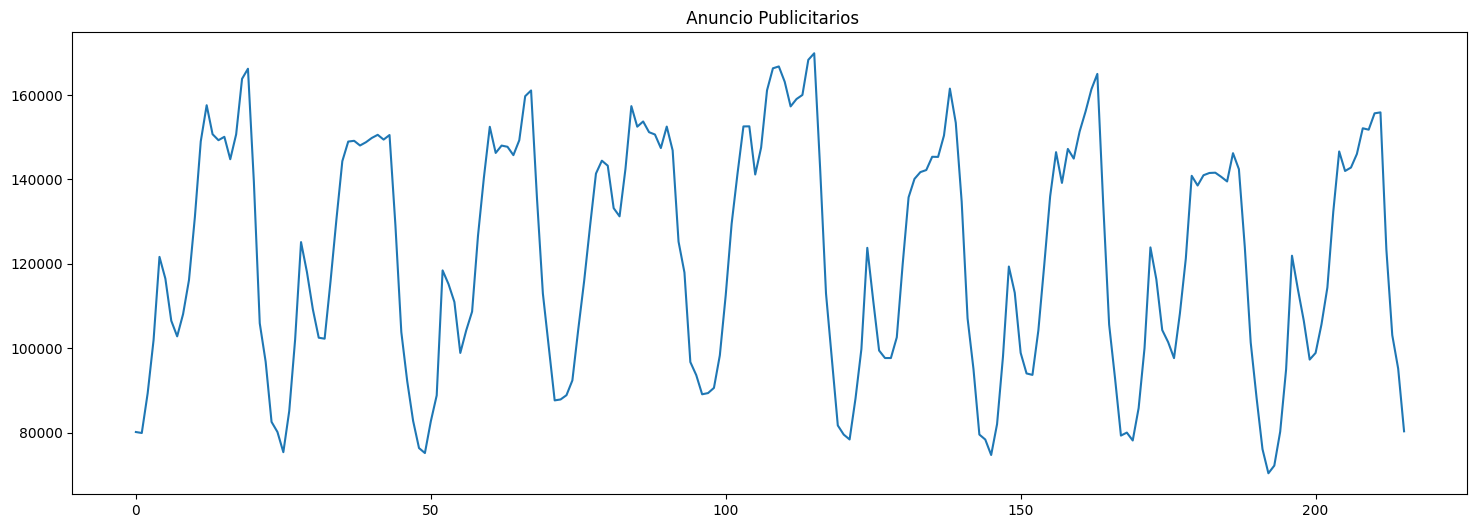

In [61]:
# Visualising the VWAP 
df_hora["Ads"].plot(figsize=(18,6),title=' Anuncio Publicitarios');

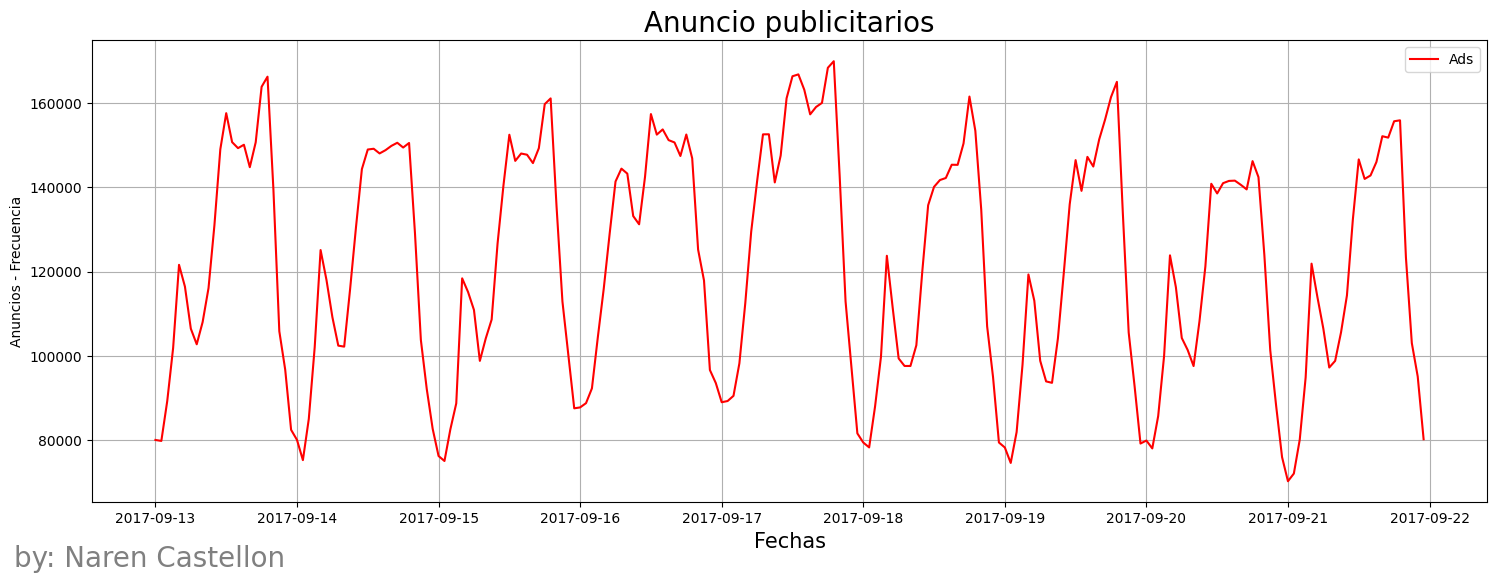

In [87]:
import matplotlib.pyplot as plt

# Graficar
plt.figure(figsize=(18, 6))
plt.plot(df_hora["Time"],  df_hora["Ads"], label = "Ads", color = "red")
plt.title("Anuncio publicitarios", fontsize = 20)
plt.xlabel("Fechas", fontsize = 15)
plt.ylabel("Anuncios - Frecuencia")
plt.text(s = 'by: Naren Castellon', x = pd.Timestamp('2017-09-12'), y = 50000, color = 'grey' , fontsize = 20)
plt.legend()
plt.grid()
plt.show()

## 11.2 Visualizando usando KDE
Resumir los datos con gráficos de densidad para ver dónde se encuentra la masa de los datos.

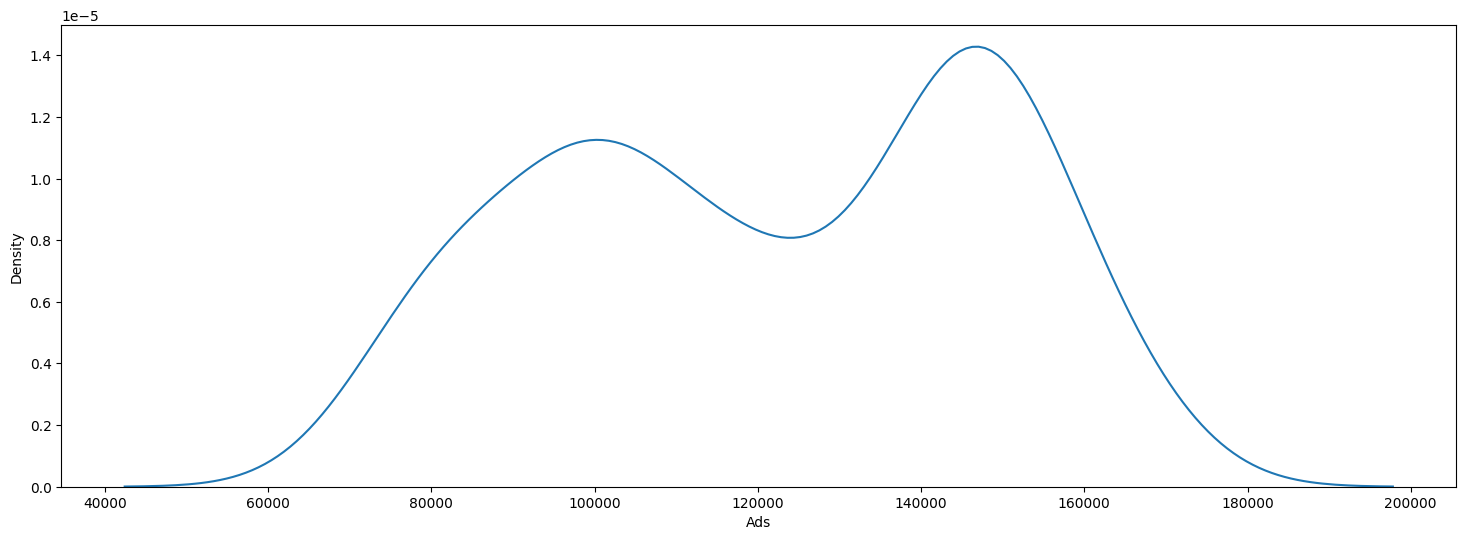

In [91]:
import seaborn as sns
plt.figure(figsize=(18, 6))
sns.kdeplot(df_hora["Ads"]);

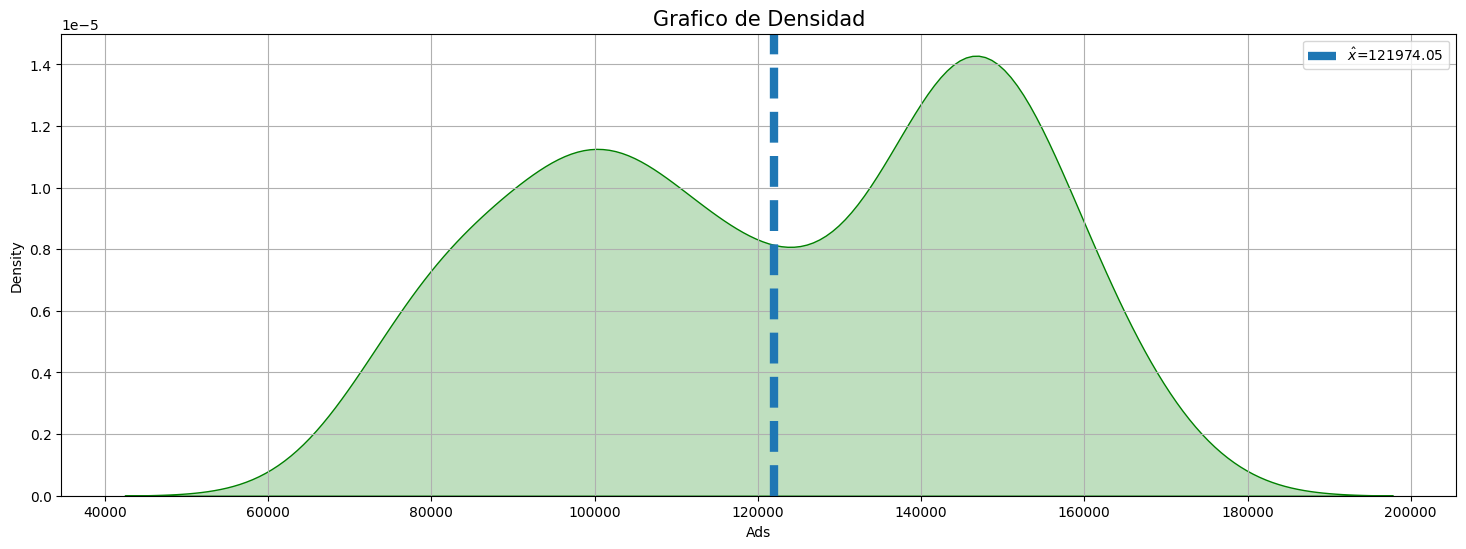

In [116]:
import seaborn as sns
plt.figure(figsize=(18, 6))
sns.kdeplot(df_hora["Ads"], shade = True, color = "green")
plt.title("Grafico de Densidad", fontsize = 15, )
plt.axvline(df_hora["Ads"].mean(), label = f'$\hat x$={round(df_hora["Ads"].mean(),2)}', linestyle='--', linewidth = 6)
plt.grid()
plt.legend()
plt.show()

# 12. Función Window 
Se utiliza una función de [Window](https://pandas.pydata.org/docs/user_guide/window.html) para calcular el número de operaciones, como el `recuento móvil, la suma móvil, la media móvil, la mediana móvil, la varianza móvil, la desviación estándar móvil, el mínimo móvil, el máximo móvil, la correlación móvil, la covarianza móvil, la asimetría móvil, la curtosis móvil. , cuantil rodante, etc`. Además, podemos realizar otras operaciones, como expandir Window y mover Windowing con ponderación exponencial. El siguiente ejemplo ilustra el resultado de las operaciones de Window en Pandas:

In [117]:
energia = pd.read_csv("https://raw.githubusercontent.com/narencastellon/Serie-de-tiempo-con-Machine-Learning/refs/heads/main/Data/Electric_Production.csv", parse_dates= ["DATE"])
energia

,DATE,Value
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


In [118]:
energia.dtypes

DATE     datetime64[ns]
Value           float64
dtype: object

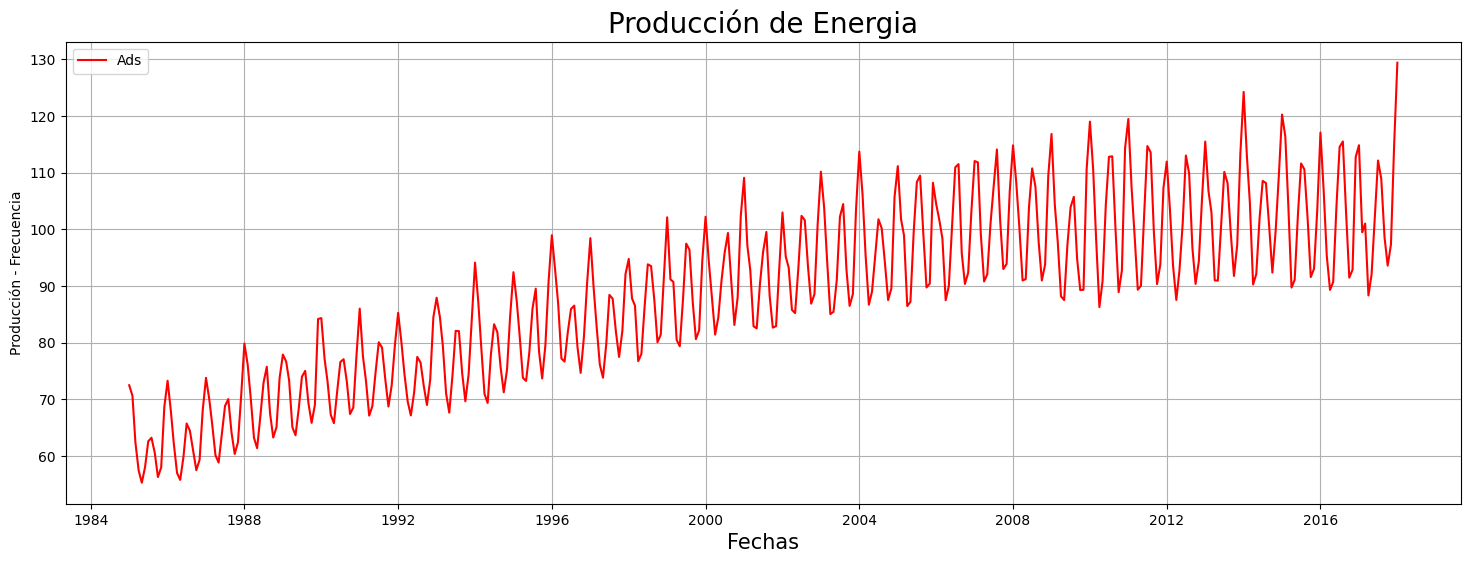

In [123]:
import matplotlib.pyplot as plt

# Graficar
plt.figure(figsize=(18, 6))
plt.plot(energia["DATE"],  energia["Value"], label = "Ads", color = "red")
plt.title("Producción de Energia", fontsize = 20)
plt.xlabel("Fechas", fontsize = 15)
plt.ylabel("Producción - Frecuencia")
#plt.text(s = 'by: Naren Castellon', x = pd.Timestamp('2017-09-12'), y = 50000, color = 'grey' , fontsize = 20)
plt.legend()
plt.grid()
plt.show()

## 12.1. Window Rolling Mean (promedio móvil)
El cálculo del `promedio móvil` crea un valor promedio actualizado para cada fila según la ventana que especifiquemos. El cálculo también se denomina "media móvil" porque calcula un promedio de valores dentro de un rango específico para cada fila a medida que avanza en el DataFrame.

La función `rolling window` admite los siguientes métodos: 

- count()
- sum()
- mean()
- median()
- var() 
- std() 
- min() y  max() 
- corr()
- cov() 
- skew() 
- kurt() 
- quantile()
- sum() 
- aggregate()

In [125]:
#rolling Window para 2 meses
rolling_window = energia["Value"].rolling(window = 2).mean()
rolling_window

0            NaN
1       71.58860
2       66.56110
3       59.96080
4       56.39325
         ...    
392    103.77330
393     96.11455
394     95.47480
395    106.02855
396    122.06300
Name: Value, Length: 397, dtype: float64

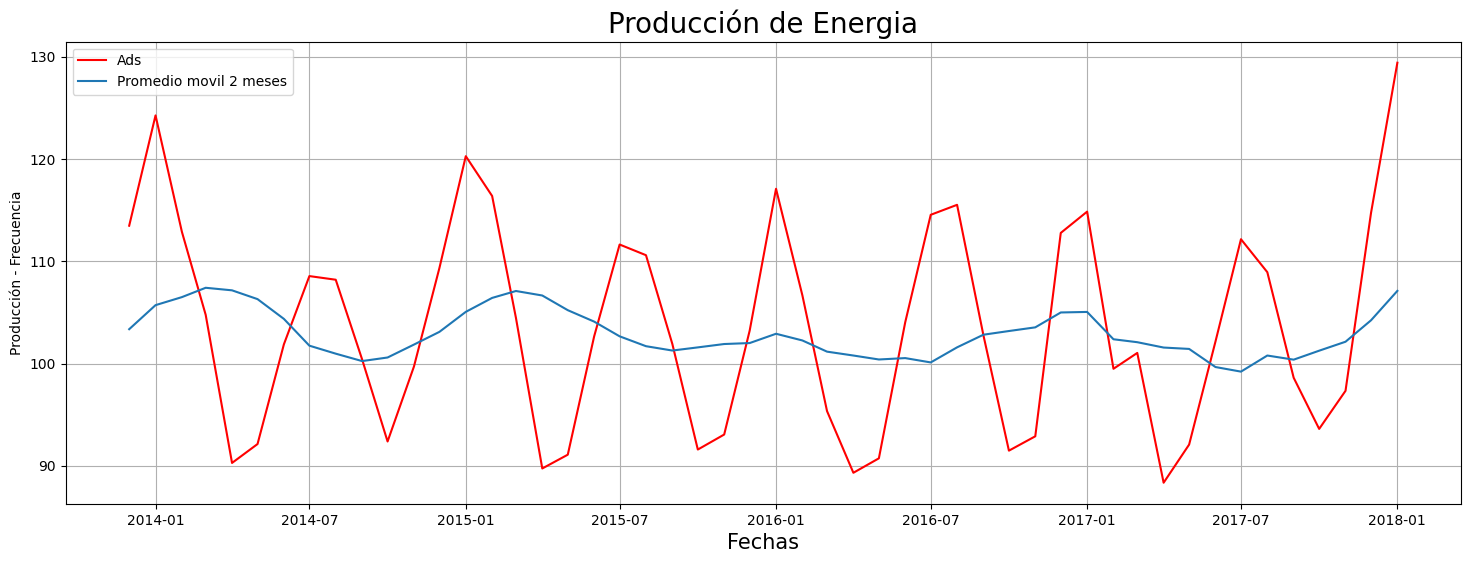

In [131]:
import matplotlib.pyplot as plt

# Graficar
plt.figure(figsize=(18, 6))
plt.plot(energia["DATE"].tail(50),  energia["Value"].tail(50), label = "Ads", color = "red")
plt.plot(energia["DATE"].tail(50), rolling_window.tail(50), label = "Promedio movil 2 meses")
plt.title("Producción de Energia", fontsize = 20)
plt.xlabel("Fechas", fontsize = 15)
plt.ylabel("Producción - Frecuencia")
#plt.text(s = 'by: Naren Castellon', x = pd.Timestamp('2017-09-12'), y = 50000, color = 'grey' , fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [132]:
#rolling Window para 2 meses
rolling_window6 = energia["Value"].rolling(window = 6).mean()
rolling_window6

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
392    100.381183
393    101.257967
394    102.133867
395    104.228533
396    107.103700
Name: Value, Length: 397, dtype: float64

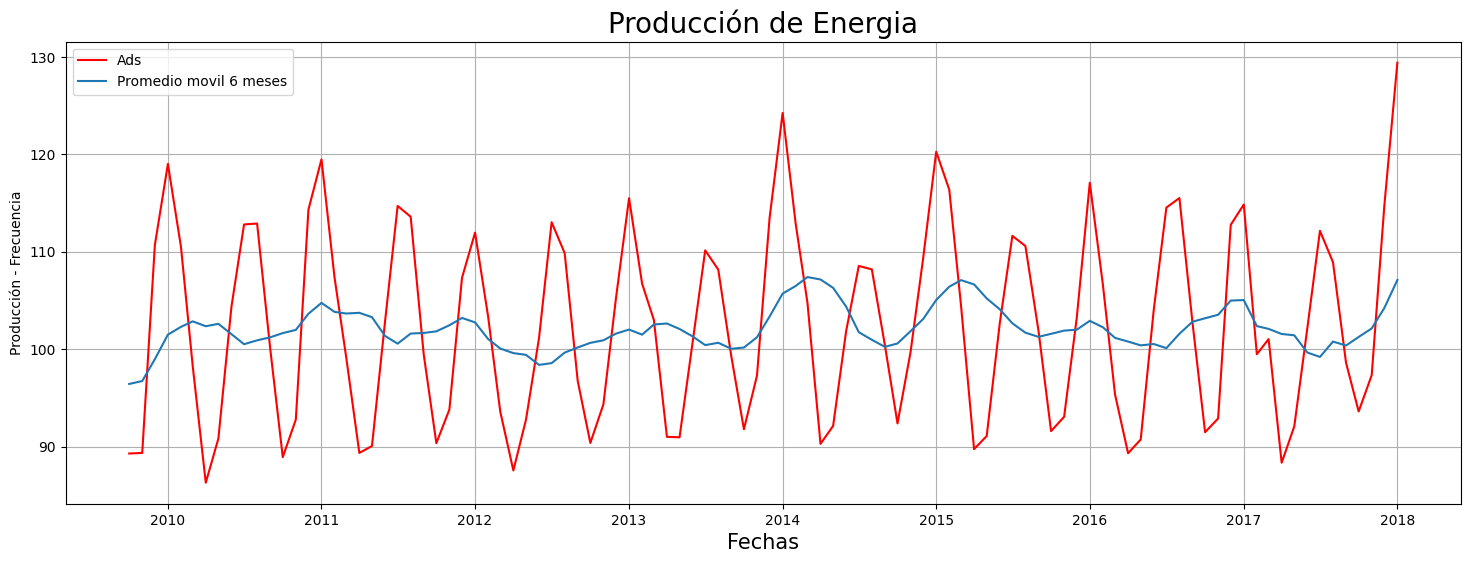

In [135]:
import matplotlib.pyplot as plt

# Graficar
plt.figure(figsize=(18, 6))
plt.plot(energia["DATE"].tail(100),  energia["Value"].tail(100), label = "Ads", color = "red")
plt.plot(energia["DATE"].tail(100), rolling_window6.tail(100), label = "Promedio movil 6 meses")
plt.title("Producción de Energia", fontsize = 20)
plt.xlabel("Fechas", fontsize = 15)
plt.ylabel("Producción - Frecuencia")
#plt.text(s = 'by: Naren Castellon', x = pd.Timestamp('2017-09-12'), y = 50000, color = 'grey' , fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [163]:
# Leemos los datos
apple = yf.download('AAPL',start='2020-01-01', 
                      end='2024-11-11',) # S&P500

apple

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.796028,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.088303,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.662720,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.320969,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.484375,132079200
...,...,...,...,...,...,...
2024-11-04,220.990005,222.789993,219.710007,222.009995,221.766006,44944500
2024-11-05,221.800003,223.949997,221.139999,223.449997,223.204422,28111300
2024-11-06,222.610001,226.070007,221.190002,222.720001,222.475235,54561100


In [164]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1223 entries, 2020-01-02 to 2024-11-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1223 non-null   float64
 1   High       1223 non-null   float64
 2   Low        1223 non-null   float64
 3   Close      1223 non-null   float64
 4   Adj Close  1223 non-null   float64
 5   Volume     1223 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 66.9 KB


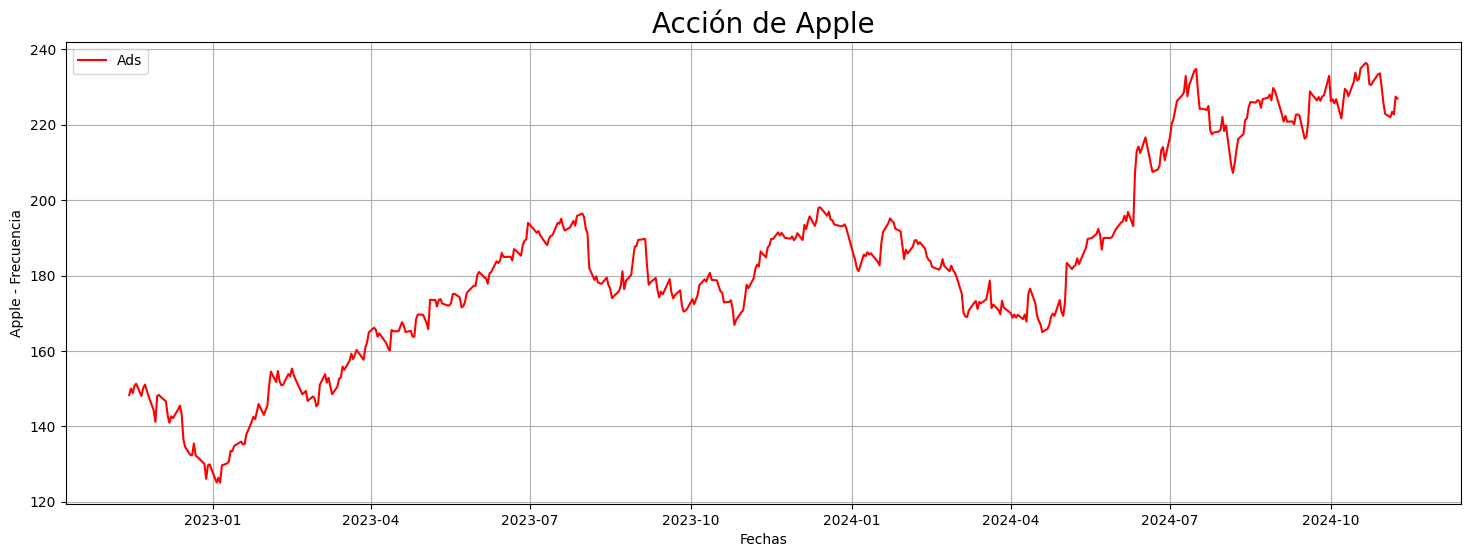

In [165]:
import matplotlib.pyplot as plt

# Graficar
plt.figure(figsize=(18, 6))
plt.plot(apple.tail(500).index,  apple["Close"].tail(500), label = "Ads", color = "red")
plt.title("Acción de Apple", fontsize = 20)
plt.xlabel("Fechas", fontsize = 10)
plt.ylabel("Apple - Frecuencia")
#plt.text(s = 'by: Naren Castellon', x = pd.Timestamp('2017-09-12'), y = 50000, color = 'grey' , fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [166]:
rolling_apple5 = apple["Close"].rolling(window = 5).mean()
rolling_apple5

Date
2020-01-02           NaN
2020-01-03           NaN
2020-01-06           NaN
2020-01-07           NaN
2020-01-08     74.958000
                 ...    
2024-11-04    226.920001
2024-11-05    224.876001
2024-11-06    223.400000
2024-11-07    223.713998
2024-11-08    224.523999
Name: Close, Length: 1223, dtype: float64

In [167]:
rolling_apple10 = apple["Close"].rolling(window = 10).mean()
rolling_apple10

Date
2020-01-02           NaN
2020-01-03           NaN
2020-01-06           NaN
2020-01-07           NaN
2020-01-08           NaN
                 ...    
2024-11-04    229.660001
2024-11-05    228.419000
2024-11-06    227.615001
2024-11-07    227.306000
2024-11-08    226.861000
Name: Close, Length: 1223, dtype: float64

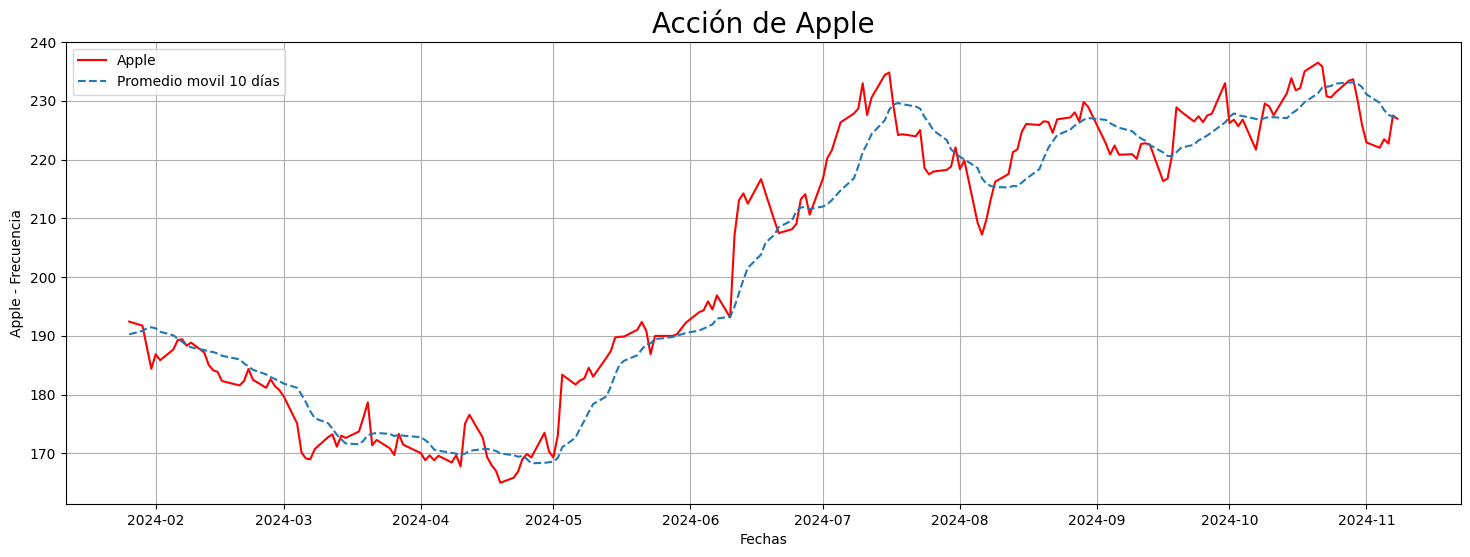

In [168]:
import matplotlib.pyplot as plt

# Graficar
plt.figure(figsize=(18, 6))
plt.plot(apple.tail(200).index,  apple["Close"].tail(200), label = "Apple", color = "red")
#plt.plot(data.tail(500).index, rolling_apple5.tail(500), label = "Promedio movil 5 días")
plt.plot(apple.tail(200).index, rolling_apple10.tail(200), linestyle='--', label = "Promedio movil 10 días")
plt.title("Acción de Apple", fontsize = 20)
plt.xlabel("Fechas", fontsize = 10)
plt.ylabel("Apple - Frecuencia")
#plt.text(s = 'by: Naren Castellon', x = pd.Timestamp('2017-09-12'), y = 50000, color = 'grey' , fontsize = 20)
plt.legend()
plt.grid()
plt.show()

## 12.2 Expanding Window

En pandas, la función `expanding()` se utiliza para realizar operaciones de ventana expansiva en los datos. Esta función es útil para calcular estadísticas acumulativas a medida que se mueve la ventana a lo largo de la serie de datos. Aquí tienes un resumen sobre la ventana expansiva en pandas:

### Características de la ventana expansiva en pandas:

1. **Operaciones acumulativas**: La función `expanding()` permite realizar operaciones acumulativas, como suma acumulativa, promedio acumulativo, máximo acumulativo, etc., a medida que se expande la ventana a lo largo de los datos.

2. **Flexibilidad**: Puedes aplicar funciones integradas de pandas, como `sum()`, `mean()`, `max()`, `min()`, `std()`, `var()`, u otras funciones personalizadas a través de `apply()`.

3. **Control de la ventana**: Puedes especificar el tamaño de la ventana o dejar que se expanda hasta el tamaño de los datos disponibles en ese momento.

4. **Manejo de valores faltantes**: La función `expanding()` maneja automáticamente los valores faltantes de manera adecuada, evitando que afecten los cálculos acumulativos.

### Sintaxis

    `DataFrame.expanding(min_periods=1, center=False, axis=0)`

### Ventajas de la ventana expansiva en pandas:

- **Análisis acumulativo**: Permite realizar análisis acumulativos sobre series de datos, lo que puede ser útil para identificar tendencias a lo largo del tiempo o detectar patrones en los datos.

- **Simplicidad**: La función `expanding()` facilita el cálculo de estadísticas acumulativas sin la necesidad de bucles explícitos.

- **Eficiencia**: Es una forma eficiente de calcular estadísticas acumulativas en grandes conjuntos de datos.

En general, la función `expanding()` en pandas es una herramienta poderosa para realizar operaciones acumulativas en series de datos, lo que facilita el análisis a lo largo del tiempo o a medida que se procesan nuevos datos.


La función [Expanding window](https://pandas.pydata.org/docs/user_guide/window.html#expanding-window) admite los siguiente métodos: 

- count()
- sum()
- mean()
- median()
- var() 
- std() 
- min() y  max() 
- corr()
- cov() 
- skew() 
- kurt() 
- quantile()
- sum() 
- aggregate()

Para todas las funciones de agregación admitidas, [Expandin window function](https://pandas.pydata.org/docs/reference/window.html#api-functions-expanding)

In [169]:
#Expanding Window
expanding_sum = apple.expanding(min_periods = 4).mean()
expanding_sum

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,74.188749,75.127499,73.870001,74.748125,72.467005,1.272656e+08
2020-01-08,74.209000,75.323999,73.954001,74.958000,72.670479,1.282283e+08
...,...,...,...,...,...,...
2024-11-04,151.242084,152.928923,149.660416,151.371452,149.551777,9.202835e+07
2024-11-05,151.299918,152.987137,149.719006,151.430533,149.612148,9.197596e+07
2024-11-06,151.358321,153.046992,149.777541,151.488919,149.671823,9.194531e+07


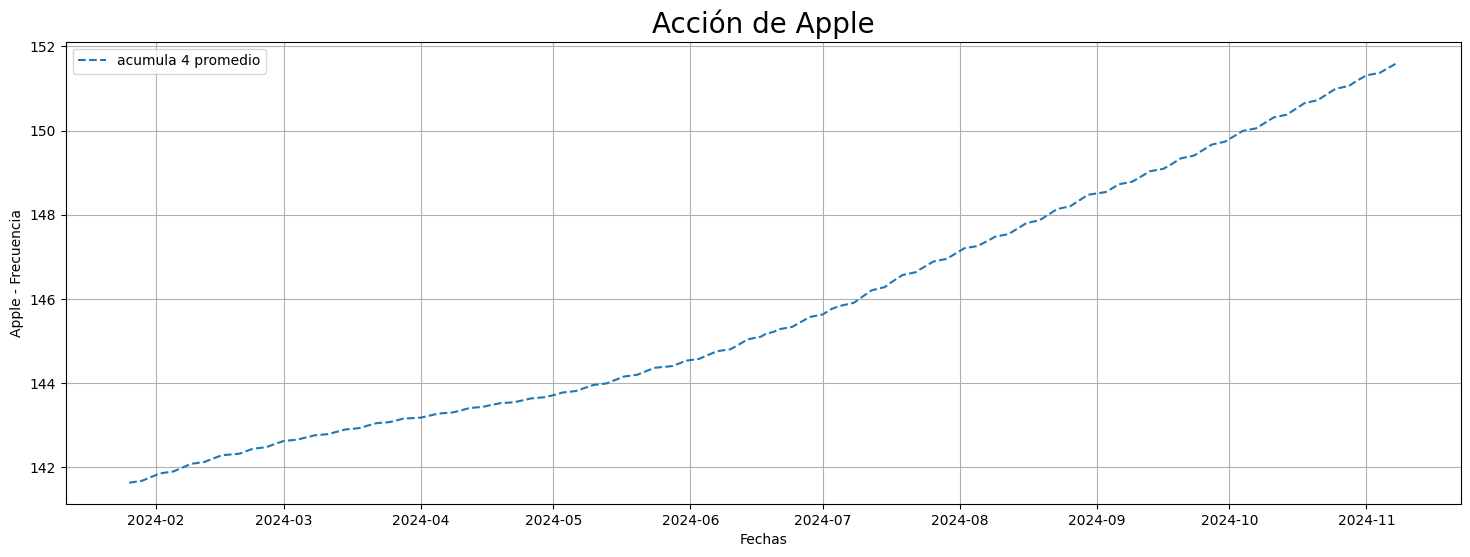

In [172]:
import matplotlib.pyplot as plt

# Graficar
plt.figure(figsize=(18, 6))
#plt.plot(apple.tail(200).index,  apple["Close"].tail(200), label = "Apple", color = "red")
plt.plot(expanding_sum.tail(200).index, expanding_sum["Close"].tail(200), linestyle='--', label = "acumula 4 promedio")
plt.title("Acción de Apple", fontsize = 20)
plt.xlabel("Fechas", fontsize = 10)
plt.ylabel("Apple - Frecuencia")
#plt.text(s = 'by: Naren Castellon', x = pd.Timestamp('2017-09-12'), y = 50000, color = 'grey' , fontsize = 20)
plt.legend()
plt.grid()
plt.show()

## 12.3 Exponentially weighted window

Una ventana ponderada exponencialmente es similar a una ventana en expansión, pero cada punto anterior se pondera exponencialmente hacia abajo en relación con el punto actual.

En general, una media móvil ponderada se calcula como

$$y_t = \frac{\sum_{i=0}^t w_i x_{t-i}}{\sum_{i=0}^t w_i},$$

donde $x_t$ es la entrada, $y_t$ es el resultado y son los pesos.

Para conocer todas las funciones de agregación admitidas, consulte [Funciones de ventana ponderadas exponencialmente](https://pandas.pydata.org/docs/reference/window.html#api-functions-ewm).

Las funciones EW admiten dos variantes de ponderaciones exponenciales. La opción predeterminada, `adjust=True`, utiliza las ponderaciones $w_i = (1 - \alpha)^i$, lo que da

$$ y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$$

Cuando se especifica `adjust=False`, los promedios móviles se calculan como

$$\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split} $$

lo cual equivale a usar pesas

$$\begin{split}w_i = \begin{cases}
    \alpha (1 - \alpha)^i & \text{if } i < t \\
    (1 - \alpha)^i        & \text{if } i = t.
\end{cases}\end{split}$$

Estas ecuaciones a veces se escriben en términos de $\alpha' = 1 - \alpha$ por ejemplo

$$y_t = \alpha' y_{t-1} + (1 - \alpha') x_t.$$

La diferencia entre las dos variantes anteriores surge porque estamos tratando con series que tienen una historia finita. Consideremos una serie con una historia infinita, con `adjust=True`:

$$y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...}
{1 + (1 - \alpha) + (1 - \alpha)^2 + ...}$$

Observando que el denominador es una serie geométrica con término inicial igual a 1 y una relación de $1- \alpha$ tenemos

$$\begin{split}y_t &= \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...}
{\frac{1}{1 - (1 - \alpha)}}\\
&= [x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...] \alpha \\
&= \alpha x_t + [(1-\alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...]\alpha \\
&= \alpha x_t + (1 - \alpha)[x_{t-1} + (1 - \alpha) x_{t-2} + ...]\alpha\\
&= \alpha x_t + (1 - \alpha) y_{t-1}\end{split} $$

que es la misma expresión que adjust=False anterior y por lo tanto muestra la equivalencia de las dos variantes para series infinitas. Cuando `adjust=False`, tenemos $y_0 = x_0$ y $y_t = \alpha x_t + (1 - \alpha) y_{t-1}$. Por lo tanto, se supone que $x_0$ no es un valor ordinario sino más bien un momento ponderado exponencialmente de la serie infinita hasta ese punto.

En Pandas, el cálculo de ventanas con promedios ponderados exponencialmente, a través de la función `ewm()` (Exponentially Weighted Moving Window), es una técnica útil para suavizar series de datos y calcular estadísticas que otorgan más peso a los datos más recientes. Aquí tienes un resumen sobre la ventana exponencialmente ponderada en Pandas:

### Características de la ventana ponderada exponencialmente en Pandas:

1. **Promedios ponderados**: La función `ewm()` calcula promedios ponderados exponencialmente a medida que se mueve la ventana a lo largo de la serie de datos. Los datos más recientes tienen más peso en el cálculo que los datos más antiguos.

2. **Flexibilidad**: Puedes especificar el valor de la tasa de decaimiento (decay) para controlar cómo se asigna el peso a los datos en la ventana. Un valor más alto de tasa de decaimiento otorga más peso a los datos recientes.

3. **Operaciones disponibles**: Puedes realizar varias operaciones con `ewm()`, como calcular el promedio, la suma, la desviación estándar u otras estadísticas sobre la ventana con promedios ponderados exponencialmente.

4. **Manejo de valores faltantes**: La función `ewm()` maneja automáticamente los valores faltantes de manera adecuada, evitando que afecten los cálculos de promedios ponderados.


### Ventajas de la ventana ponderada exponencialmente en Pandas:

- **Suavizado de datos**: Permite suavizar series de datos para resaltar tendencias y patrones significativos.
- **Enfoque en datos recientes**: Otorga más peso a los datos más recientes, lo que es útil para capturar cambios recientes en los datos.
- **Flexibilidad en la tasa de decaimiento**: Permite ajustar la influencia de los datos pasados en el cálculo del promedio ponderado.

En general, la función `ewm()` en Pandas es una herramienta valiosa para calcular promedios ponderados exponencialmente y suavizar series de datos, lo que facilita el análisis de tendencias y patrones en datos temporales.

La sintaxis básica del método ewm() es la siguiente:

    `DataFrame.ewm(alpha=None, beta=None, com=None, span=None, halflife=None, min_periods=0, adjust=True, ignore_na=False, axis=0)`

La función `ewm()` admite los siguientes métodos: mean, std, var, corr, and cov.

Más info: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html

La función `ewm()` en Pandas se utiliza para calcular promedios ponderados exponencialmente en una serie de datos. Los parámetros que puede aceptar esta función controlan cómo se calculan estos promedios ponderados exponencialmente. Aquí tienes una explicación de cada parámetro:

1. **`alpha`**: Es el parámetro de suavizado que controla la tasa de decaimiento exponencial. Un valor más alto de alpha dará más peso a los datos más recientes en el cálculo del promedio ponderado.

2. **`beta`**: Se relaciona con `alpha` y se utiliza para calcularlo en función de la ventana de tiempo. Puedes especificar `beta` en lugar de `alpha`.

3. **`com`**: El parámetro `com` es similar a `alpha` y `beta` pero se expresa en términos de com. `com` = 1 / (span + 1), donde `span` es la longitud de tiempo.

4. **`span`**: El parámetro `span` especifica la ventana de tiempo para calcular el promedio ponderado exponencialmente. Se relaciona con `alpha` y `com`.

5. **`halflife`**: La `halflife` es el período de tiempo en el que el peso de los datos se reduce a la mitad. Se puede utilizar en lugar de `span` o `alpha`.

6. **`min_periods`**: Es el número mínimo de observaciones necesarias para calcular un promedio ponderado exponencialmente en una ventana. Si no se cumple este número mínimo, el resultado será NaN.

7. **`adjust`**: Indica si se debe ajustar el promedio ponderado para compensar el sesgo inicial debido a la falta de datos en el inicio.

8. **`ignore_na`**: Si es `True`, los valores NaN se ignoran durante el cálculo del promedio ponderado exponencialmente.

9. **`axis`**: Especifica el eje a lo largo del cual se calculan los promedios ponderados exponencialmente.

Estos parámetros en la función `ewm()` de Pandas permiten ajustar cómo se calculan los promedios ponderados exponencialmente y controlar aspectos como la tasa de decaimiento, la ventana de tiempo, el manejo de valores faltantes y otros ajustes para el cálculo de estos promedios.

In [173]:
apple

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.796028,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.088303,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.662720,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.320969,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.484375,132079200
...,...,...,...,...,...,...
2024-11-04,220.990005,222.789993,219.710007,222.009995,221.766006,44944500
2024-11-05,221.800003,223.949997,221.139999,223.449997,223.204422,28111300
2024-11-06,222.610001,226.070007,221.190002,222.720001,222.475235,54561100


In [190]:
ewm_mean = apple["Close"].ewm(com = 0.1).mean()
ewm_mean

Date
2020-01-02     75.087502
2020-01-03     74.418332
2020-01-06     74.902027
2020-01-07     74.625169
2020-01-08     75.690932
                 ...    
2024-11-04    222.119996
2024-11-05    223.329088
2024-11-06    222.775373
2024-11-07    227.052303
2024-11-08    226.968397
Name: Close, Length: 1223, dtype: float64

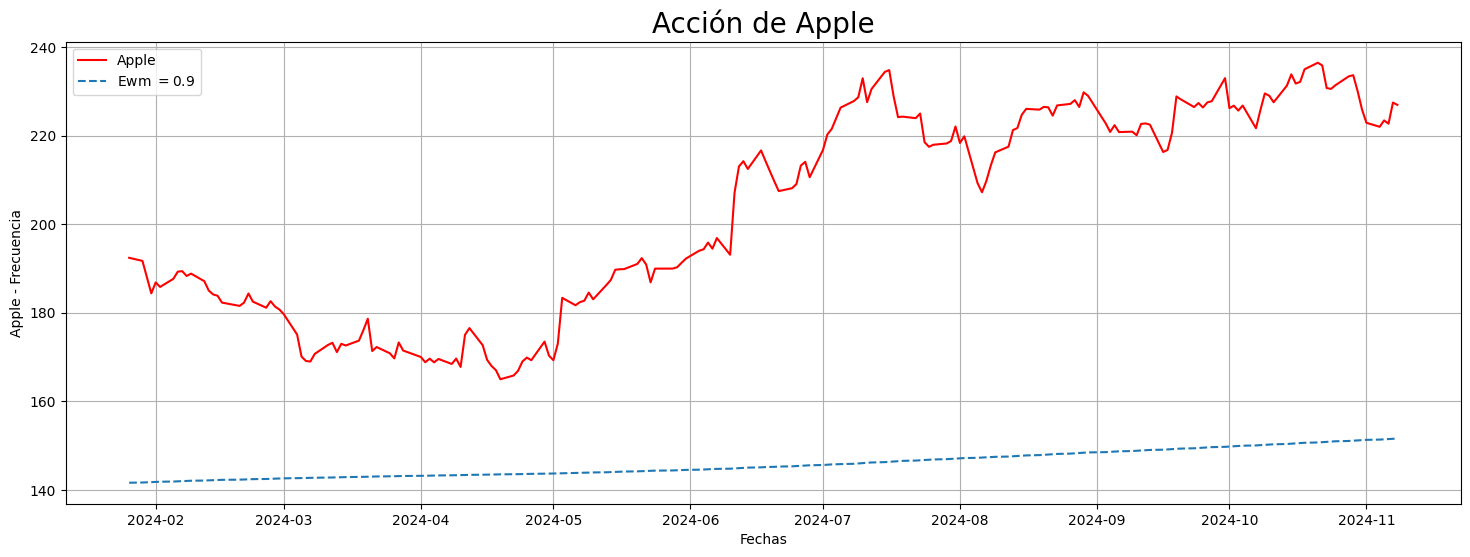

In [192]:
import matplotlib.pyplot as plt

# Graficar
plt.figure(figsize=(18, 6))
plt.plot(apple.tail(200).index,  apple["Close"].tail(200), label = "Apple", color = "red")
plt.plot(ewm_mean.tail(200).index, expanding_sum["Close"].tail(200), linestyle='--', label = f'Ewm $={0.9 }$' )
plt.title("Acción de Apple", fontsize = 20)
plt.xlabel("Fechas", fontsize = 10)
plt.ylabel("Apple - Frecuencia")
#plt.text(s = 'by: Naren Castellon', x = pd.Timestamp('2017-09-12'), y = 50000, color = 'grey' , fontsize = 20)
plt.legend()
plt.grid()
plt.show()

## 13. Shifting

[Shifting](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html) también se conoce como `lag` "retraso" representan los valores pasados de la serie de tiempo.

El método `shift()` en Pandas es útil en diversas situaciones, ya que permite desplazar los valores de una serie o un DataFrame a lo largo de un eje específico. Aquí se presentan algunos casos de uso comunes del método `shift()`:

1. Cálculo de diferencias: Al desplazar una serie hacia arriba o hacia abajo, se pueden calcular las diferencias entre observaciones adyacentes. Esto es útil para analizar cambios en los datos a lo largo del tiempo. Por ejemplo, al restar una serie original de su versión desplazada hacia abajo, se puede obtener una serie que muestra las diferencias entre los valores en pasos de tiempo consecutivos.

2. Comparación de valores en momentos anteriores o posteriores: Al desplazar los valores de una serie, se pueden comparar los valores actuales con los valores en momentos anteriores o posteriores. Esto es útil para analizar tendencias o patrones en los datos. Por ejemplo, al desplazar una serie hacia abajo, se pueden comparar los valores actuales con los valores en el paso de tiempo anterior.

3. Análisis de datos de series de tiempo: El desplazamiento de valores es común en el análisis de datos de series de tiempo. Puede ser utilizado para calcular retornos, rendimientos o cambios porcentuales en los datos. También es útil para realizar análisis comparativos entre diferentes momentos en el tiempo.

4. Tratamiento de datos faltantes: Al desplazar los valores, se pueden llenar los espacios vacíos con NaN o con un valor especificado. Esto es útil para tratar datos faltantes o para alinear series de diferentes frecuencias de tiempo.

Estos son solo algunos ejemplos de cómo se puede utilizar el método `shift()` en el análisis de datos. En general, este método proporciona flexibilidad para manipular y transformar los datos en función de las necesidades específicas del análisis.

 Pandas tiene una función `df.shift()` para cambiar un índice por el número deseado de períodos con una frecuencia de tiempo opcional. El siguiente ejemplo ilustra el resultado de las operaciones de cambio en Pandas:

In [204]:
df_hora =  pd.read_csv("https://raw.githubusercontent.com/narencastellon/Serie-de-tiempo-con-Machine-Learning/refs/heads/main/Data/ads.csv", parse_dates= ["Time"])
df_hora

,Time,Ads
0,2017-09-13 00:00:00,80115
1,2017-09-13 01:00:00,79885
2,2017-09-13 02:00:00,89325
3,2017-09-13 03:00:00,101930
4,2017-09-13 04:00:00,121630
...,...,...
211,2017-09-21 19:00:00,155890
212,2017-09-21 20:00:00,123395
213,2017-09-21 21:00:00,103080
214,2017-09-21 22:00:00,95155


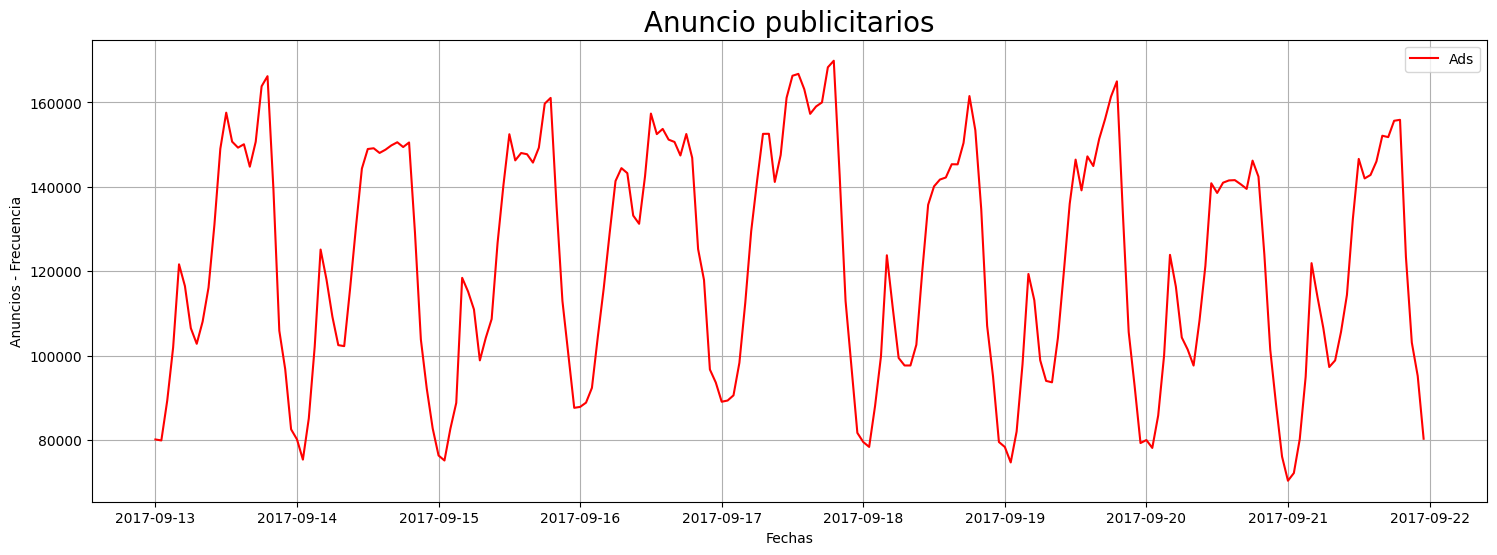

In [198]:
import matplotlib.pyplot as plt

# Graficar
plt.figure(figsize=(18, 6))
plt.plot(df_hora["Time"],  df_hora["Ads"], label = "Ads", color = "red")
plt.title("Anuncio publicitarios", fontsize = 20)
plt.xlabel("Fechas", fontsize = 10)
plt.ylabel("Anuncios - Frecuencia")
#plt.text(s = 'by: Naren Castellon', x = pd.Timestamp('2017-09-12'), y = 50000, color = 'grey' , fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [200]:
lag1 = df_hora["Ads"].shift(periods = 1)
lag1

0           NaN
1       80115.0
2       79885.0
3       89325.0
4      101930.0
         ...   
211    155665.0
212    155890.0
213    123395.0
214    103080.0
215     95155.0
Name: Ads, Length: 216, dtype: float64

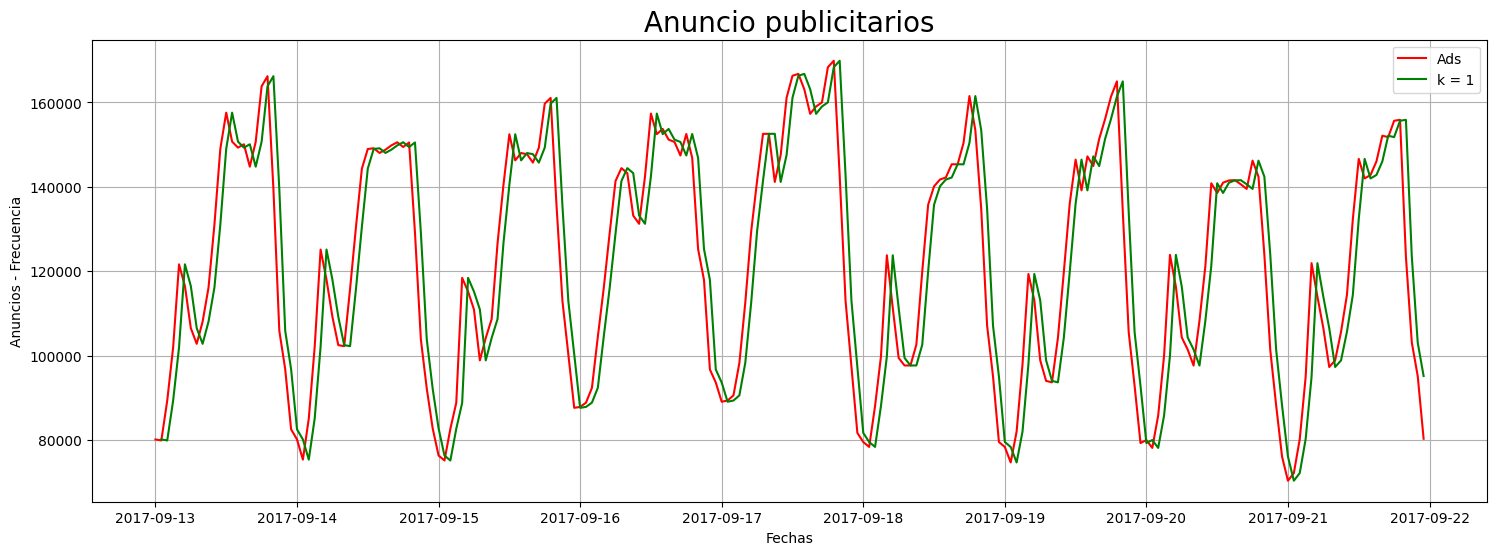

In [206]:
import matplotlib.pyplot as plt

# Graficar
plt.figure(figsize=(18, 6))
plt.plot(df_hora["Time"],  df_hora["Ads"], label = "Ads", color = "red")
plt.plot(df_hora["Time"],  lag1, label = "k = 1", color = "green")
plt.title("Anuncio publicitarios", fontsize = 20)
plt.xlabel("Fechas", fontsize = 10)
plt.ylabel("Anuncios - Frecuencia")
#plt.text(s = 'by: Naren Castellon', x = pd.Timestamp('2017-09-12'), y = 50000, color = 'grey' , fontsize = 20)
plt.legend()
plt.grid()
plt.show()

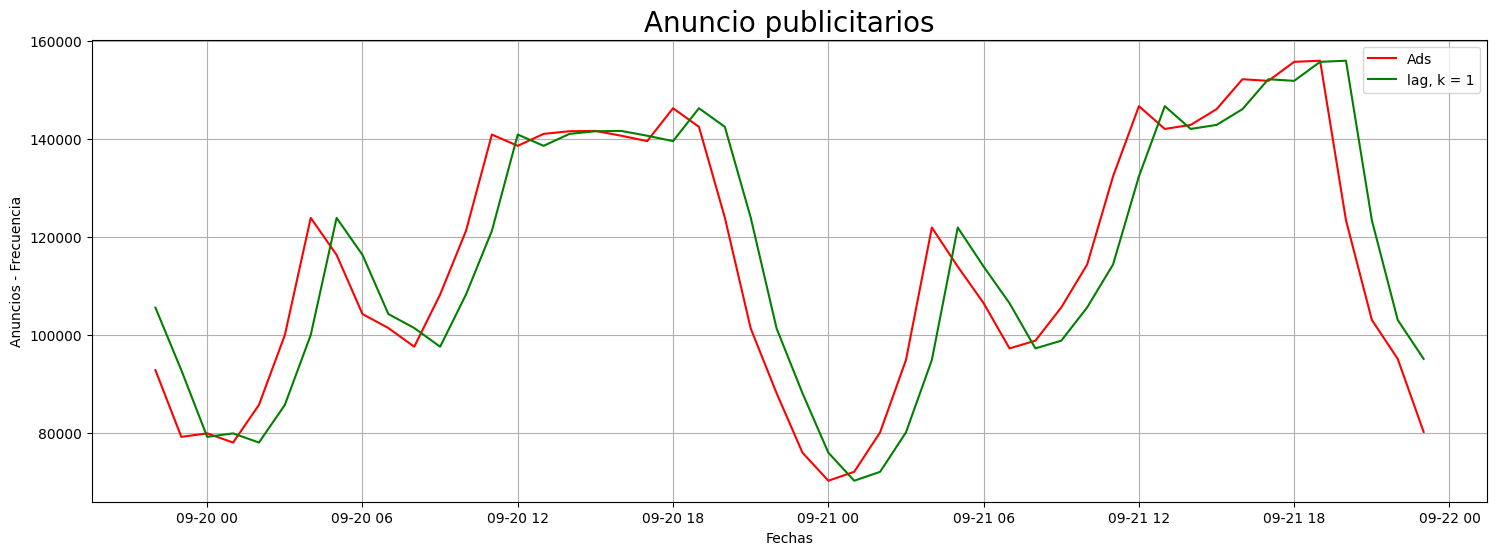

In [207]:
import matplotlib.pyplot as plt

# Graficar
plt.figure(figsize=(18, 6))
plt.plot(df_hora["Time"].tail(50),  df_hora["Ads"].tail(50), label = "Ads", color = "red")
plt.plot(df_hora["Time"].tail(50),  lag1.tail(50), label = "lag, k = 1", color = "green")
plt.title("Anuncio publicitarios", fontsize = 20)
plt.xlabel("Fechas", fontsize = 10)
plt.ylabel("Anuncios - Frecuencia")
#plt.text(s = 'by: Naren Castellon', x = pd.Timestamp('2017-09-12'), y = 50000, color = 'grey' , fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [208]:
lag5 = df_hora["Ads"].shift(periods = 5)
lag5

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
211    142815.0
212    146020.0
213    152120.0
214    151790.0
215    155665.0
Name: Ads, Length: 216, dtype: float64

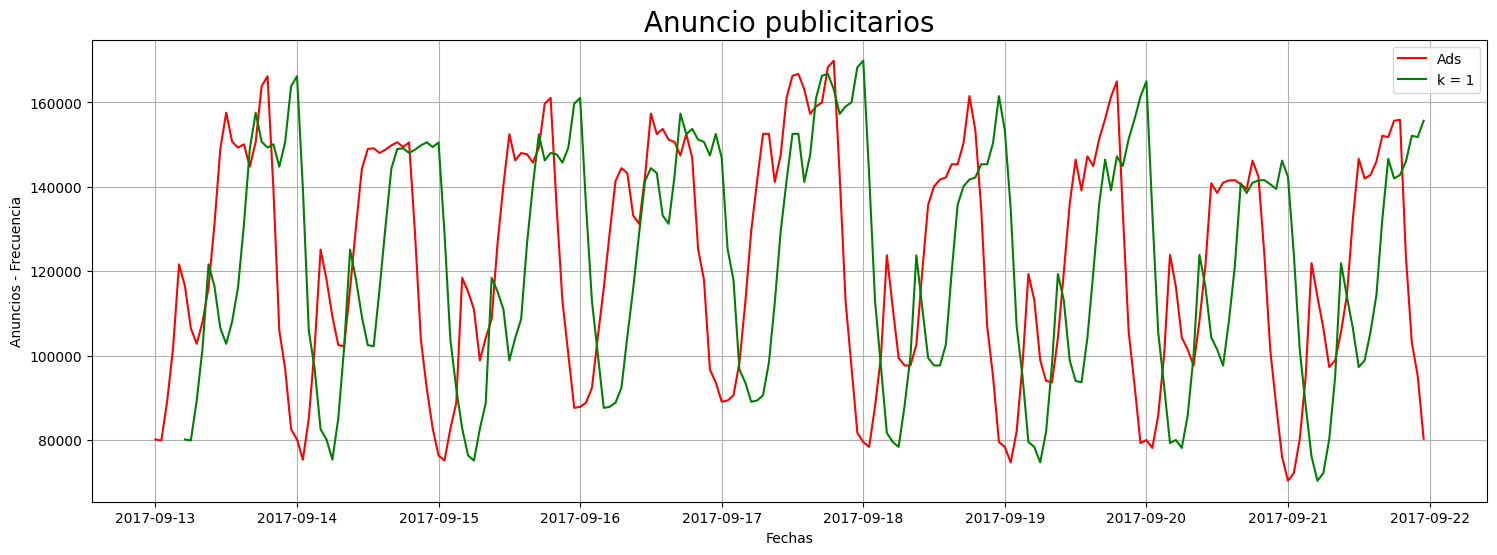

In [209]:
import matplotlib.pyplot as plt

# Graficar
plt.figure(figsize=(18, 6))
plt.plot(df_hora["Time"],  df_hora["Ads"], label = "Ads", color = "red")
plt.plot(df_hora["Time"],  lag5, label = "k = 1", color = "green")
plt.title("Anuncio publicitarios", fontsize = 20)
plt.xlabel("Fechas", fontsize = 10)
plt.ylabel("Anuncios - Frecuencia")
#plt.text(s = 'by: Naren Castellon', x = pd.Timestamp('2017-09-12'), y = 50000, color = 'grey' , fontsize = 20)
plt.legend()
plt.grid()
plt.show()

# 14. Manejo de datos faltantes

Un valor faltante o datos faltantes ocurren cuando no se encuentra ningún valor de datos en un número respectivo de lugares en un DataFrame o conjunto de datos. Un valor faltante presenta muchos problemas en el conjunto de datos. Reduce el poder estadístico de los datos, y los datos perdidos pueden aumentar el sesgo en el conjunto de datos. Por lo tanto, es esencial manejar este valor faltante para mantener las características de los datos. Pandas tiene varios métodos para manejar los valores que faltan, como `bfill()`, `ffill()`, `interpolate()` y `fillna()`. 

In [222]:
df = pd.read_csv("https://raw.githubusercontent.com/narencastellon/Serie-de-tiempo-con-Machine-Learning/refs/heads/main/Data/Aquifer_Petrignano.csv", parse_dates= ["Date"])
df

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,2006-03-14,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,2006-03-15,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,2006-03-16,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,2006-03-17,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,2006-03-18,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5218,2020-06-26,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5
5219,2020-06-27,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4
5220,2020-06-28,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4
5221,2020-06-29,0.0,-25.78,-25.18,26.9,26.0,-30602.880,2.4


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  5223 non-null   datetime64[ns]
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64       
 2   Depth_to_Groundwater_P24              5168 non-null   float64       
 3   Depth_to_Groundwater_P25              5184 non-null   float64       
 4   Temperature_Bastia_Umbra              4199 non-null   float64       
 5   Temperature_Petrignano                4199 non-null   float64       
 6   Volume_C10_Petrignano                 5025 non-null   float64       
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 326.6 KB


In [224]:
df.isnull().sum()

Date                                       0
Rainfall_Bastia_Umbra                   1024
Depth_to_Groundwater_P24                  55
Depth_to_Groundwater_P25                  39
Temperature_Bastia_Umbra                1024
Temperature_Petrignano                  1024
Volume_C10_Petrignano                    198
Hydrometry_Fiume_Chiascio_Petrignano    1024
dtype: int64

In [227]:
#Muestra las filas que tiene los valores perdidos para la variable x
df[pd.isnull(df["Depth_to_Groundwater_P24"])].head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
87,2006-09-06,NaN,NaN,-21.77,NaN,NaN,NaN,NaN
215,2006-10-15,NaN,NaN,-24.66,NaN,NaN,-32152.032,NaN
275,2006-12-14,NaN,NaN,-25.75,NaN,NaN,-34235.136,NaN
537,2007-02-09,NaN,NaN,-29.25,NaN,NaN,-30994.272,NaN
646,2007-12-20,NaN,NaN,-30.40,NaN,NaN,-25832.736,NaN


<center><img src="https://maelfabien.github.io/assets/images/ts2_11.jpg" width="800" height="500"></center>

## 14.1 BFILL

El método [bfill()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.bfill.html) (backward fill) en Pandas se utiliza para rellenar los valores faltantes (NaN) en una serie o un DataFrame utilizando los valores no nulos que se encuentran después de los valores faltantes. Es decir, los valores faltantes se llenan con los valores que aparecen justo después en la secuencia de datos.

El método `bfill()` busca los valores no nulos más cercanos en la secuencia de datos y los utiliza para rellenar los valores faltantes hacia atrás. Si no hay valores no nulos después de los valores faltantes, los valores permanecerán como NaN.

En Pandas, el método `bfill()` se utiliza para propagar hacia atrás los valores no nulos a través de un DataFrame o una Serie.

### Características del método `bfill()`:

1. **Backfilling de valores**: El método `bfill()` se utiliza para llenar los valores faltantes en un DataFrame o una Serie propagando hacia atrás los últimos valores no nulos conocidos.

2. **Propagación de valores hacia atrás**: Cuando se encuentra un valor nulo, `bfill()` lo reemplaza con el valor no nulo más cercano que se encuentra posteriormente en la serie de datos.

3. **Útil en datos ordenados**: `bfill()` es útil cuando se trabaja con datos ordenados temporalmente o espacialmente y se desea llenar los valores faltantes utilizando información posterior en la secuencia.

4. **Personalización**: Puedes controlar cómo se propagan los valores hacia atrás especificando parámetros adicionales, como el eje a lo largo del cual se realiza el backfilling.


### Ventajas del método `bfill()`:

- **Llenado basado en datos posteriores**: Permite llenar los valores faltantes utilizando información posterior en la secuencia de datos.
- **Simplicidad**: Es una forma sencilla de manejar los valores faltantes mediante la propagación de los valores no nulos hacia atrás.
- **Aplicabilidad temporal**: Es especialmente útil en datos secuenciales donde los valores faltantes pueden ser inferidos a partir de datos futuros.

En general, el método `bfill()` en Pandas es una herramienta útil para llenar valores faltantes en un DataFrame o una Serie propagando hacia atrás los últimos valores no nulos conocidos. Esto facilita la imputación de datos faltantes basándose en información posterior en la secuencia de datos.

In [228]:
df.bfill()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,2006-03-14,0.0,-22.48,-22.18,5.2,4.9,-29281.824,2.4
1,2006-03-15,0.0,-22.38,-22.14,5.2,4.9,-29281.824,2.4
2,2006-03-16,0.0,-22.25,-22.04,5.2,4.9,-29281.824,2.4
3,2006-03-17,0.0,-22.38,-22.04,5.2,4.9,-29281.824,2.4
4,2006-03-18,0.0,-22.60,-22.04,5.2,4.9,-29281.824,2.4
...,...,...,...,...,...,...,...,...
5218,2020-06-26,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5
5219,2020-06-27,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4
5220,2020-06-28,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4
5221,2020-06-29,0.0,-25.78,-25.18,26.9,26.0,-30602.880,2.4


## 14.2. FFILL

El método [ffill()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ffill.html) (forward fill) en Pandas se utiliza para rellenar los valores faltantes (NaN) en una serie o DataFrame utilizando los valores no nulos que se encuentran antes de los valores faltantes. Es decir, los valores faltantes se llenan con los valores que aparecen justo antes en la secuencia de datos.

El método `ffill()` busca los valores no nulos más cercanos en la secuencia de datos y los utiliza para rellenar los valores faltantes hacia adelante. Si no hay valores no nulos antes de los valores faltantes, los valores permanecerán como NaN.

El método `ffill()` en Pandas se utiliza para propagar hacia adelante los valores no nulos a través de un DataFrame o una Serie. Aquí tienes un resumen sobre el método `ffill()`:

### Características del método `ffill()`:

1. **Forward Filling de valores**: `ffill()` se utiliza para llenar los valores faltantes en un DataFrame o una Serie propagando hacia adelante los últimos valores no nulos conocidos.

2. **Propagación de valores hacia adelante**: Cuando se encuentra un valor nulo, `ffill()` lo reemplaza con el valor no nulo más cercano que se encuentra anteriormente en la serie de datos.

3. **Útil en datos ordenados**: `ffill()` es útil cuando se trabaja con datos ordenados temporalmente o espacialmente y se desea llenar los valores faltantes utilizando información anterior en la secuencia.

4. **Personalización**: Puedes controlar cómo se propagan los valores hacia adelante especificando parámetros adicionales, como el eje a lo largo del cual se realiza el forward filling.


### Ventajas del método `ffill()`:

- **Llenado basado en datos anteriores**: Permite llenar los valores faltantes utilizando información anterior en la secuencia de datos.
- **Simplicidad**: Es una forma sencilla de manejar los valores faltantes mediante la propagación de los valores no nulos hacia adelante.
- **Aplicabilidad temporal**: Es especialmente útil en datos secuenciales donde los valores faltantes pueden ser inferidos a partir de datos anteriores.

El método `ffill()` en Pandas es una herramienta útil para llenar valores faltantes en un DataFrame o una Serie propagando hacia adelante los últimos valores no nulos conocidos. Esto facilita la imputación de datos faltantes basándose en información anterior en la secuencia de datos.

In [229]:
df.ffill()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,2006-03-14,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,2006-03-15,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,2006-03-16,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,2006-03-17,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,2006-03-18,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5218,2020-06-26,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5
5219,2020-06-27,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4
5220,2020-06-28,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4
5221,2020-06-29,0.0,-25.78,-25.18,26.9,26.0,-30602.880,2.4


## 14.3. FILLNA

La funcion [fillna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) reemplaza los valores NA/NaN usando un valor constante.

In [230]:
df.fillna(10)

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,2006-03-14,10.0,-22.48,-22.18,10.0,10.0,10.000,10.0
1,2006-03-15,10.0,-22.38,-22.14,10.0,10.0,10.000,10.0
2,2006-03-16,10.0,-22.25,-22.04,10.0,10.0,10.000,10.0
3,2006-03-17,10.0,-22.38,-22.04,10.0,10.0,10.000,10.0
4,2006-03-18,10.0,-22.60,-22.04,10.0,10.0,10.000,10.0
...,...,...,...,...,...,...,...,...
5218,2020-06-26,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5
5219,2020-06-27,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4
5220,2020-06-28,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4
5221,2020-06-29,0.0,-25.78,-25.18,26.9,26.0,-30602.880,2.4


## 14.4.INTERPOLACIÓN

El método [interpolate()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html) en Pandas se utiliza para rellenar los valores faltantes (NaN) en una serie o DataFrame mediante la interpolación de los valores no nulos que los rodean. La interpolación es un método para estimar valores desconocidos en función de los valores conocidos más cercanos.

In [231]:
df

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,2006-03-14,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,2006-03-15,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,2006-03-16,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,2006-03-17,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,2006-03-18,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5218,2020-06-26,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5
5219,2020-06-27,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4
5220,2020-06-28,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4
5221,2020-06-29,0.0,-25.78,-25.18,26.9,26.0,-30602.880,2.4


In [234]:
df["Rainfall_Bastia_Umbra"].interpolate(method='linear',limit_direction='forward')

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
5218    0.0
5219    0.0
5220    0.0
5221    0.0
5222    0.0
Name: Rainfall_Bastia_Umbra, Length: 5223, dtype: float64

In [235]:
df["Rainfall_Bastia_Umbra"].interpolate(method='linear',limit_direction = 'backward')

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
5218    0.0
5219    0.0
5220    0.0
5221    0.0
5222    0.0
Name: Rainfall_Bastia_Umbra, Length: 5223, dtype: float64

In [236]:
df["Rainfall_Bastia_Umbra"].interpolate(method='linear',limit_direction = 'both')

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
5218    0.0
5219    0.0
5220    0.0
5221    0.0
5222    0.0
Name: Rainfall_Bastia_Umbra, Length: 5223, dtype: float64

## 14.5 Knn Imputer

La clase [KNNImputer](https://scikit-learn.org/stable/modules/impute.html#knnimpute) proporciona imputación para completar los valores faltantes utilizando el enfoque k-Vecinos más cercanos. De forma predeterminada, se utiliza una métrica de distancia euclidiana que admite valores faltantes, nan_euclidean_distances, para encontrar los vecinos más cercanos. Cada característica faltante se imputa utilizando valores de n_neighbors vecinos más cercanos que tienen un valor para la característica. Las características de los vecinos se promedian uniformemente o se ponderan por la distancia a cada vecino. Si a una muestra le falta más de una característica, entonces los vecinos de esa muestra pueden ser diferentes dependiendo de la característica particular que se impute. Cuando el número de vecinos disponibles es menor que n_vecinos y no hay distancias definidas al conjunto de entrenamiento, el promedio del conjunto de entrenamiento para esa característica se utiliza durante la imputación. Si hay al menos un vecino con una distancia definida, durante la imputación se utilizará el promedio ponderado o no ponderado de los vecinos restantes. Si siempre falta una característica en el entrenamiento, se elimina durante la transformación.

In [238]:
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,2006-03-14,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,2006-03-15,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,2006-03-16,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,2006-03-17,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,2006-03-18,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [240]:
import numpy as np
from sklearn.impute import KNNImputer

# Llamo a la función para imputar los datos
imputer = KNNImputer(n_neighbors=3)

# Imputamos los datos
knnimp_df = imputer.fit_transform(df[["Temperature_Bastia_Umbra"]])
knnimp_df

array([[15.03029293],
       [15.03029293],
       [15.03029293],
       ...,
       [26.9       ],
       [26.9       ],
       [27.3       ]])

## 14.6 Imputación usando la Media

Usaremos el parámetro de la media para llenar o completar aquellos valores que se han considerados por nosotros como perdidos.
Una vez que ya hemos identificado las variables y/o columnas de los valores faltantes, entonces procedemos a la completar. La siguiente instrucción muestra una forma de como hacerlo usando el promedio o media aritmética.

In [245]:
df = pd.read_csv("https://raw.githubusercontent.com/narencastellon/Serie-de-tiempo-con-Machine-Learning/refs/heads/main/Data/Aquifer_Petrignano.csv", parse_dates= ["Date"])
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,2006-03-14,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,2006-03-15,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,2006-03-16,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,2006-03-17,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,2006-03-18,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [243]:
#Muestra las filas que tiene los valores perdidos para la variable x
df[pd.isnull(df)].head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [250]:
df["Rainfall_Bastia_Umbra"].fillna(df["Rainfall_Bastia_Umbra"].mean())

0       1.556633
1       1.556633
2       1.556633
3       1.556633
4       1.556633
          ...   
5218    0.000000
5219    0.000000
5220    0.000000
5221    0.000000
5222    0.000000
Name: Rainfall_Bastia_Umbra, Length: 5223, dtype: float64

## 14.7 Imputacion con la Mediana

De igual forma que hemos procesado para el reemplazo de los valores faltante con la media, de la misma manera procedemos a hacer los mismo pero ahora con la mediana

In [251]:
df["Rainfall_Bastia_Umbra"].fillna(df["Rainfall_Bastia_Umbra"].median())

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
5218    0.0
5219    0.0
5220    0.0
5221    0.0
5222    0.0
Name: Rainfall_Bastia_Umbra, Length: 5223, dtype: float64

## 14.8. Imputación usando Moda

Procedemos a hacer los mismo con la moda

In [254]:
df["Depth_to_Groundwater_P24"].fillna(df["Depth_to_Groundwater_P24"].mode())

0      -22.48
1      -22.38
2      -22.25
3      -22.38
4      -22.60
        ...  
5218   -25.68
5219   -25.80
5220   -25.80
5221   -25.78
5222   -25.91
Name: Depth_to_Groundwater_P24, Length: 5223, dtype: float64

# 15. Feature time series

Extraigamos las características de fecha y hora de la columna Fecha.

In [259]:
feature =  pd.read_csv("https://raw.githubusercontent.com/narencastellon/Serie-de-tiempo-con-Machine-Learning/refs/heads/main/Data/ads.csv", parse_dates = ["Time"])
feature.head()

,Time,Ads
0,2017-09-13 00:00:00,80115
1,2017-09-13 01:00:00,79885
2,2017-09-13 02:00:00,89325
3,2017-09-13 03:00:00,101930
4,2017-09-13 04:00:00,121630


In [260]:
feature["Time"].dt.year

0      2017
1      2017
2      2017
3      2017
4      2017
       ... 
211    2017
212    2017
213    2017
214    2017
215    2017
Name: Time, Length: 216, dtype: int64

In [262]:
feature["month"]=feature['Time'].dt.month # Los meses
feature["day"]=feature['Time'].dt.day #Los dias 
feature["day_week"]=feature['Time'].dt.day_of_week # dias de la semans
feature["month_name"]=feature['Time'].dt.month_name() # Nombre mes
feature["day_name"]=feature['Time'].dt.day_name() # nombre del dia
feature["hora"]=feature['Time'].dt.hour# horas

In [263]:
feature

,Time,Ads,month,day,day_week,month_name,day_name,hora
0,2017-09-13 00:00:00,80115,9,13,2,September,Wednesday,0
1,2017-09-13 01:00:00,79885,9,13,2,September,Wednesday,1
2,2017-09-13 02:00:00,89325,9,13,2,September,Wednesday,2
3,2017-09-13 03:00:00,101930,9,13,2,September,Wednesday,3
4,2017-09-13 04:00:00,121630,9,13,2,September,Wednesday,4
...,...,...,...,...,...,...,...,...
211,2017-09-21 19:00:00,155890,9,21,3,September,Thursday,19
212,2017-09-21 20:00:00,123395,9,21,3,September,Thursday,20
213,2017-09-21 21:00:00,103080,9,21,3,September,Thursday,21
214,2017-09-21 22:00:00,95155,9,21,3,September,Thursday,22


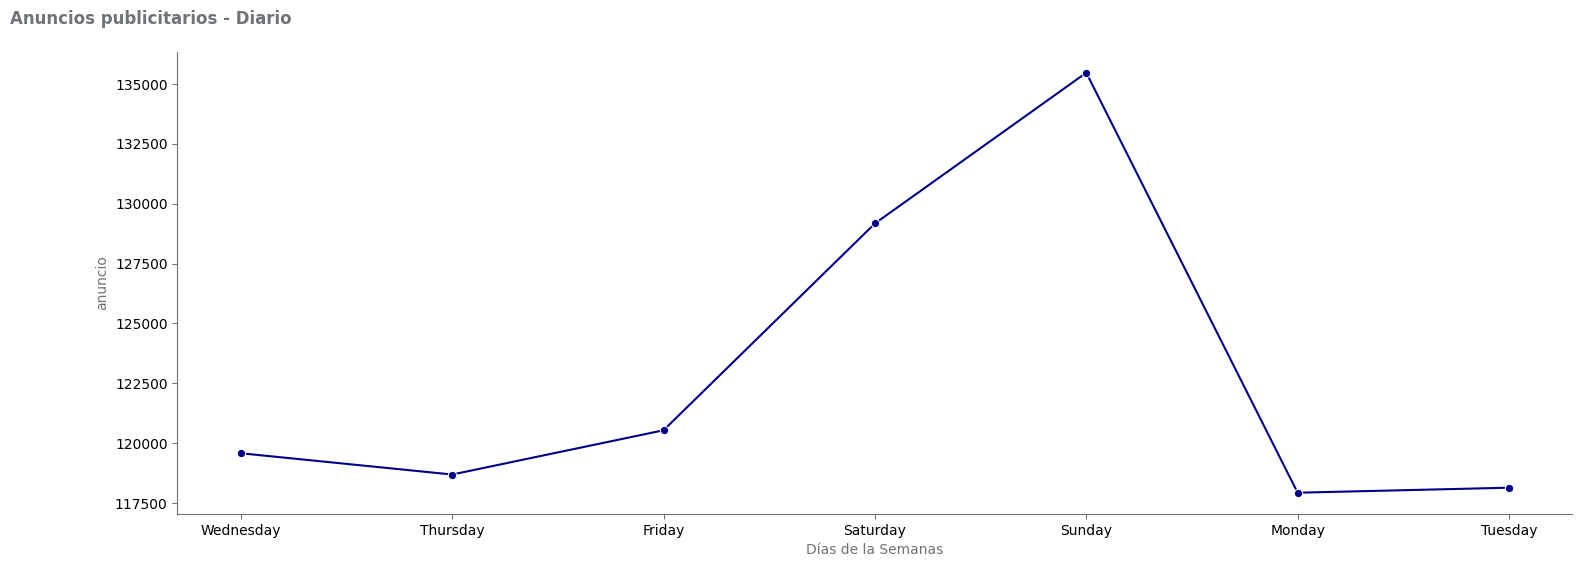

In [270]:
# Set the figure and axes
fig, ax = plt.subplots(figsize=(18,6))

# Plot the daily sales performance
sns.lineplot(x = 'day_name', y = 'Ads', data = feature, ci=None, color='darkblue',
             marker='o', ax=ax)

# Despine the right side
sns.despine(right=True)

ax.set_xlabel('Días de la Semanas', color='#6F7378')
ax.set_ylabel('anuncio', color='#6F7378')

for spine in ax.spines.values():
    spine.set_edgecolor('#6F7378')

ax.set_title('Anuncios publicitarios - Diario', pad=20, x=-0.12,
             weight='bold', color='#6F7378', ha='left')
ax.tick_params(color='#6F7378')

plt.show()

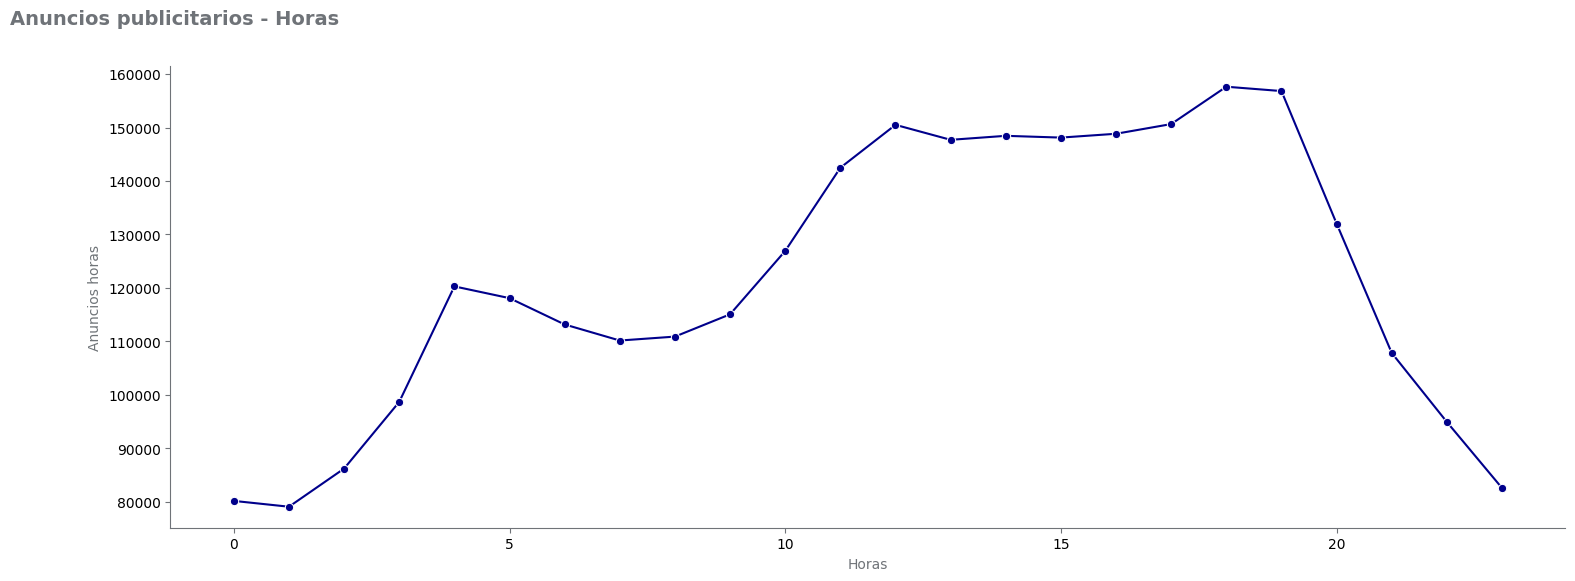

In [274]:
# Set the figure and axes
fig, ax = plt.subplots(figsize=(18,6))

# Plot the sales trend across the date
sns.lineplot(x = 'hora', y = 'Ads', data= feature, ci=None, marker='o', color='darkblue', ax=ax)

# Despine the right side
sns.despine(right=True)

# Set the label
ax.set_xlabel('Horas', color='#6F7378')
ax.set_ylabel('Anuncios horas', color='#6F7478')

# Change the spine color
for spine in ax.spines.values():
    spine.set_edgecolor('#6F7378')

# Set the title
ax.set_title('Anuncios publicitarios - Horas', weight='bold', pad=30, size=14, x=-0.115,
             color='#6F7378', ha='left') 

# Change tick color
ax.tick_params(color='#6F7378')

plt.show()

1. Cargar librerias
2. Cargar datos con Pandas
3. Exploración Inicial de Datos
4. Cambio de tipo de Datos
5. Exploración pandasql
6. Orden by
7. Agregación
8. Join merge
9. Summary  de Data Frame
10. Resampling
11. Visualización de Series de tiempo
12. Función window
13. Shifting o lags
14. Manejo de datos nulos
15. Feature time series

In [ ]:
df_hora =  pd.read_csv("https://raw.githubusercontent.com/narencastellon/Serie-de-tiempo-con-Machine-Learning/refs/heads/main/Data/ads.csv")
df_hora.head()